 1. Automating lending decision-making using machine learning is revolutionizing the finance and lending industry by leveraging advanced algorithms to streamline and enhance the approval process.
 
 2. Traditionally, loan approvals involved labor-intensive manual reviews and subjective judgments which not only leads to inefficiencies and potential biases but also can be time consuming.

 3. Machine learning lending decision automation hold high promise in speeding up the approval process, reducing the time from application to decision, improving operational efficiency and reducing on labor-related  costs.
 
 4. Automated systems enables real-time processing of loan applications, can handle large volumes of applications simultaneously and hence scaling operations without the need for proportional increases in resources.
 
 5. This work focus on evaluating the extend at which leveraging the three machine learning algorithms: Random Forest, XGBoost and LGBM in loan application decision making can reduce the cost of loan processing



In [665]:
import warnings
warnings.filterwarnings("ignore")

#Im
import time, psutil, os, gc

# Mathematical functions
import math

# Data manipulation
import numpy as np
np.bool = np.bool_
import pandas as pd
import matplotlib.pyplot as plt
import shap  # For SHAP values explanation
# Fit SHAP explainer and obtain SHAP values f
# Plotting and visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# Train-test split
from sklearn.model_selection import train_test_split

# Progress bar for loop
from tqdm.contrib import itertools
df = pd.read_excel('TWINO_task_data_scientist.xlsx', sheet_name='Data')
df.head()

,application_id,AR,payment_method,client_first_lapp_mark,client_first_manual_lapp_mark,warning_count,address_check_1,address_check_2,address_check_3,address_check_4,...,other_29,data_quality_30,other_31,data_quality_32,data_quality_33,data_quality_34,data_quality_35,other_36,accounts_check_37,accounts_check_38
0,1,0,METHOD1,Yes,Yes,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,0,METHOD1,No,Yes,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,0,METHOD1,No,Yes,6,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,0,METHOD1,No,Yes,7,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,0,METHOD1,No,No,5,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [666]:
# Create dummy variables for all categorical columns
data = pd.get_dummies(df)
data.shape

(9898, 49)

In [667]:
import xgboost

In [668]:
data.columns

Index(['application_id', 'AR', 'warning_count', 'address_check_1',
       'address_check_2', 'address_check_3', 'address_check_4',
       'accounts_check_5', 'accounts_check_6', 'data_comparison_7',
       'data_comparison_8', 'data_comparison_9', 'data_comparison_10',
       'data_comparison_11', 'data_comparison_12', 'data_comparison_13',
       'data_comparison_14', 'data_comparison_15', 'creditcard_check_16',
       'creditcard_check_17', 'creditcard_check_18', 'data_quality_19',
       'data_quality_20', 'other_21', 'other_22', 'data_quality_23',
       'data_quality_24', 'data_quality_25', 'data_quality_26',
       'data_quality_27', 'data_quality_28', 'other_29', 'data_quality_30',
       'other_31', 'data_quality_32', 'data_quality_33', 'data_quality_34',
       'data_quality_35', 'other_36', 'accounts_check_37', 'accounts_check_38',
       'payment_method_METHOD1', 'payment_method_METHOD2',
       'payment_method_METHOD3', 'payment_method_METHOD4',
       'client_first_lapp_ma

In [669]:
# Convert boolean values to 1 and 0
data = data.astype(int)
data.head()

,application_id,AR,warning_count,address_check_1,address_check_2,address_check_3,address_check_4,accounts_check_5,accounts_check_6,data_comparison_7,...,accounts_check_37,accounts_check_38,payment_method_METHOD1,payment_method_METHOD2,payment_method_METHOD3,payment_method_METHOD4,client_first_lapp_mark_No,client_first_lapp_mark_Yes,client_first_manual_lapp_mark_No,client_first_manual_lapp_mark_Yes
0,1,0,2,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
1,2,0,2,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2,3,0,6,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
3,4,0,7,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,5,0,5,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0


In [670]:
#Check Train dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9898 entries, 0 to 9897
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   application_id                     9898 non-null   int64
 1   AR                                 9898 non-null   int64
 2   warning_count                      9898 non-null   int64
 3   address_check_1                    9898 non-null   int64
 4   address_check_2                    9898 non-null   int64
 5   address_check_3                    9898 non-null   int64
 6   address_check_4                    9898 non-null   int64
 7   accounts_check_5                   9898 non-null   int64
 8   accounts_check_6                   9898 non-null   int64
 9   data_comparison_7                  9898 non-null   int64
 10  data_comparison_8                  9898 non-null   int64
 11  data_comparison_9                  9898 non-null   int64
 12  data_comparison_10  

In [671]:
data['warning_count'].min(),data['warning_count'].max()

(1, 16)

In [672]:
# Define bins and labels
bins = [1, 4, 8, 12, 16]
labels = ['1-4', '5-8', '9-12', '13-16']

# Bin the 'age' feature
data['warning_count_binned'] = pd.cut(data['warning_count'], bins=bins, labels=labels)

In [673]:
data['average_warning_count'] = data.groupby('application_id')['warning_count'].transform('mean')
data['total_warning_count'] = data.groupby('application_id')['warning_count'].transform('sum')
data['min_warning_count'] = data.groupby('application_id')['warning_count'].transform('min')
data['max_warning_count'] = data.groupby('application_id')['warning_count'].transform('max')
data.columns

Index(['application_id', 'AR', 'warning_count', 'address_check_1',
       'address_check_2', 'address_check_3', 'address_check_4',
       'accounts_check_5', 'accounts_check_6', 'data_comparison_7',
       'data_comparison_8', 'data_comparison_9', 'data_comparison_10',
       'data_comparison_11', 'data_comparison_12', 'data_comparison_13',
       'data_comparison_14', 'data_comparison_15', 'creditcard_check_16',
       'creditcard_check_17', 'creditcard_check_18', 'data_quality_19',
       'data_quality_20', 'other_21', 'other_22', 'data_quality_23',
       'data_quality_24', 'data_quality_25', 'data_quality_26',
       'data_quality_27', 'data_quality_28', 'other_29', 'data_quality_30',
       'other_31', 'data_quality_32', 'data_quality_33', 'data_quality_34',
       'data_quality_35', 'other_36', 'accounts_check_37', 'accounts_check_38',
       'payment_method_METHOD1', 'payment_method_METHOD2',
       'payment_method_METHOD3', 'payment_method_METHOD4',
       'client_first_lapp_ma

In [674]:
most_frequent = data['warning_count_binned'].mode()[0]
data['warning_count_binned'] = data['warning_count_binned'].fillna(most_frequent)
data = pd.get_dummies(data)
data = data.astype(int)
data.head()

,application_id,AR,warning_count,address_check_1,address_check_2,address_check_3,address_check_4,accounts_check_5,accounts_check_6,data_comparison_7,...,client_first_manual_lapp_mark_No,client_first_manual_lapp_mark_Yes,average_warning_count,total_warning_count,min_warning_count,max_warning_count,warning_count_binned_1-4,warning_count_binned_5-8,warning_count_binned_9-12,warning_count_binned_13-16
0,1,0,2,0,0,0,0,0,0,0,...,0,1,2,2,2,2,1,0,0,0
1,2,0,2,0,0,0,0,0,0,0,...,0,1,2,2,2,2,1,0,0,0
2,3,0,6,0,0,0,0,0,0,0,...,0,1,6,6,6,6,0,1,0,0
3,4,0,7,0,0,0,0,0,0,0,...,0,1,7,7,7,7,0,1,0,0
4,5,0,5,0,0,0,0,0,0,0,...,1,0,5,5,5,5,0,1,0,0


In [675]:
import pandas as pd
import numpy as np

# Sample DataFrame
# data = pd.read_csv('your_data.csv')  # Replace with your actual DataFrame

# List of columns for aggregation
columns = [
    'warning_count', 'address_check_1', 'address_check_2', 'address_check_3', 'address_check_4',
    'accounts_check_5', 'accounts_check_6', 'data_comparison_7', 'data_comparison_8', 'data_comparison_9',
    'data_comparison_10', 'data_comparison_11', 'data_comparison_12', 'data_comparison_13', 'data_comparison_14',
    'data_comparison_15', 'creditcard_check_16', 'creditcard_check_17', 'creditcard_check_18',
    'data_quality_19', 'data_quality_20', 'other_21', 'other_22', 'data_quality_23',
    'data_quality_24', 'data_quality_25', 'data_quality_26', 'data_quality_27', 'data_quality_28', 
    'other_29', 'data_quality_30', 'other_31', 'data_quality_32', 'data_quality_33', 'data_quality_34',
    'data_quality_35', 'other_36', 'accounts_check_37', 'accounts_check_38',
    'payment_method_METHOD1', 'payment_method_METHOD2', 'payment_method_METHOD3', 'payment_method_METHOD4',
    'client_first_lapp_mark_No', 'client_first_lapp_mark_Yes',
    'client_first_manual_lapp_mark_No', 'client_first_manual_lapp_mark_Yes',
    'average_warning_count', 'total_warning_count', 'min_warning_count', 'max_warning_count',
    'warning_count_binned_1-4', 'warning_count_binned_5-8', 'warning_count_binned_9-12', 'warning_count_binned_13-16'
]

def create_features(df):
    # Combine similar features into aggregated columns
    df['total_data_comparison'] = df[['data_comparison_7', 'data_comparison_8', 'data_comparison_9', 
                                      'data_comparison_10', 'data_comparison_11', 'data_comparison_12', 
                                      'data_comparison_13', 'data_comparison_14', 'data_comparison_15']].sum(axis=1)
    df['total_data_quality'] = df[['data_quality_19', 'data_quality_20', 'data_quality_23', 
                                   'data_quality_24', 'data_quality_25', 'data_quality_26', 
                                   'data_quality_27', 'data_quality_28', 'data_quality_30', 
                                   'data_quality_32', 'data_quality_33', 'data_quality_34', 
                                   'data_quality_35']].sum(axis=1)
    df['total_warning_bins'] = df[['warning_count_binned_1-4', 'warning_count_binned_5-8', 
                                   'warning_count_binned_9-12', 'warning_count_binned_13-16']].sum(axis=1)
    
    df['total_address_check'] = df[['address_check_1', 'address_check_2', 'address_check_3', 
                                    'address_check_4']].sum(axis=1)
    df['total_accounts_check'] = df[['accounts_check_5', 'accounts_check_6', 
                                     'accounts_check_37', 'accounts_check_38']].sum(axis=1)
    
    # Basic aggregations
    df['sum_all'] = df[columns].sum(axis=1)
    df['mean_all'] = df[columns].mean(axis=1)
    df['std_all'] = df[columns].std(axis=1)
    df['min_all'] = df[columns].min(axis=1)
    df['max_all'] = df[columns].max(axis=1)

    # Key Polynomial Features
    polynomial_features = ['warning_count', 'total_warning_count', 'average_warning_count']
    for col in polynomial_features:
        df[f'{col}^2'] = df[col] ** 2

    # Key Log Transformations
    log_columns = ['warning_count', 'total_warning_count', 'average_warning_count']
    for col in log_columns:
        df[f'log_{col}'] = np.log1p(df[col])
    
    # Ratio Features
    df['ratio_warning_to_total_data_quality'] = np.where(df['total_data_quality'] != 0, df['warning_count'] / df['total_data_quality'], 0)
    
    return df

# Apply feature creation
data = create_features(data)

# Optionally, print the number of columns to verify
print(f"Total number of columns after feature engineering: {data.shape[1]}")

Total number of columns after feature engineering: 74


In [676]:
columns1=data.columns.to_list()

In [677]:
import pandas as pd
import numpy as np

# Sample DataFrame
# data = pd.read_csv('your_data.csv')  # Replace with your actual DataFrame

# List of columns for aggregation
columns = [
    'warning_count', 'address_check_1', 'address_check_2', 'address_check_3', 'address_check_4',
    'accounts_check_5', 'accounts_check_6', 'data_comparison_7', 'data_comparison_8', 'data_comparison_9',
    'data_comparison_10', 'data_comparison_11', 'data_comparison_12', 'data_comparison_13', 'data_comparison_14',
    'data_comparison_15', 'creditcard_check_16', 'creditcard_check_17', 'creditcard_check_18',
    'data_quality_19', 'data_quality_20', 'other_21', 'other_22', 'data_quality_23',
    'data_quality_24', 'data_quality_25', 'data_quality_26', 'data_quality_27', 'data_quality_28', 
    'other_29', 'data_quality_30', 'other_31', 'data_quality_32', 'data_quality_33', 'data_quality_34',
    'data_quality_35', 'other_36', 'accounts_check_37', 'accounts_check_38',
    'payment_method_METHOD1', 'payment_method_METHOD2', 'payment_method_METHOD3', 'payment_method_METHOD4',
    'client_first_lapp_mark_No', 'client_first_lapp_mark_Yes',
    'client_first_manual_lapp_mark_No', 'client_first_manual_lapp_mark_Yes',
    'average_warning_count', 'total_warning_count', 'min_warning_count', 'max_warning_count',
    'warning_count_binned_1-4', 'warning_count_binned_5-8', 'warning_count_binned_9-12', 'warning_count_binned_13-16'
]

# Function to create additional features
def create_features(df):
    # Basic aggregations
    df['sum_all'] = df[columns].sum(axis=1)
    df['mean_all'] = df[columns].mean(axis=1)
    df['std_all'] = df[columns].std(axis=1)
    df['min_all'] = df[columns].min(axis=1)
    df['max_all'] = df[columns].max(axis=1)
    df['count_nonzero'] = (df[columns] != 0).sum(axis=1)
    
    # Pairwise interactions
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            df[f'interaction_{columns[i]}_{columns[j]}'] = df[columns[i]] * df[columns[j]]
    
    # Polynomial features
    for col in columns:
        df[f'{col}^2'] = df[col] ** 2
        df[f'{col}^3'] = df[col] ** 3
    
    # Log transformations (where the column is positive to avoid log(0))
    for col in columns:
        df[f'log_{col}'] = np.log1p(df[col])
    
    # Aggregations by categories
    payment_methods = ['payment_method_METHOD1', 'payment_method_METHOD2', 'payment_method_METHOD3', 'payment_method_METHOD4']
    df['payment_method_sum'] = df[payment_methods].sum(axis=1)
    df['payment_method_mean'] = df[payment_methods].mean(axis=1)
    
    warning_binned = [
        'warning_count_binned_1-4', 'warning_count_binned_5-8', 
        'warning_count_binned_9-12', 'warning_count_binned_13-16'
    ]
    df['warning_binned_sum'] = df[warning_binned].sum(axis=1)
    df['warning_binned_mean'] = df[warning_binned].mean(axis=1)
    
    # Ratio features (avoid division by zero)
    for col1 in columns:
        for col2 in columns:
            if col1 != col2:
                df[f'{col1}_div_{col2}'] = np.where(df[col2] != 0, df[col1] / df[col2], 0)
    
    return df

# Apply feature creation
data = create_features(data)

# Optionally, print the number of columns to verify
print(f"Total number of columns after feature engineering: {data.shape[1]}")

Total number of columns after feature engineering: 4693


In [678]:
columns2=data.columns.to_list()[4100:4150]
columns3=data.columns.to_list()[1000:1100]
columns4=data.columns.to_list()[2200:2300]
columns5=data.columns.to_list()[4000:4500]
columns6=data.columns.to_list()[3000:3100]
col=columns1+columns2

In [679]:
data=data[col]
data.shape

(9898, 124)

# Encoding Functions

Below are 5 encoding functions. (1) encode_FE does frequency encoding where it combines train and test first and then encodes. (2) encode_LE is a label encoded for categorical features (3) encode_AG makes aggregated features such as aggregated mean and std (4) encode_CB combines two columns (5) encode_AG2 makes aggregated features where it counts how many unique values of one feature is within a group.

In [680]:
X=data.drop('AR', axis=1)
y=data['AR']

import pandas as pd
import numpy as np

# Sample DataFrame
# data = pd.read_csv('your_data.csv')  # Replace with your actual DataFrame

# Assuming the DataFrame `data` has 4696 columns
all_columns = data.columns.tolist()

# Select the first 60 columns
first_60_columns = all_columns[:60]

# Remaining columns
remaining_columns = all_columns[60:]

# Randomly select 500 columns from the remaining columns
np.random.seed(0)  # For reproducibility, set a random seed
random_500_columns = np.random.choice(remaining_columns, 500, replace=False)

# Combine the selected columns
selected_columns = first_60_columns + list(random_500_columns)

# Feature Selection

## (a) Recursive Feature Elimination (RFE)

RFE works by recursively removing the least important features based on a specified estimator. Here's an example using RFE with LogisticRegression as the estimator:

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Initialize RFE with RandomForestClassifier estimator
estimator = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(estimator, n_features_to_select=20, verbose=1)
# Fit RFE
rfe.fit(X, y)
# Get selected feature indices
selected_feature_indices = rfe.support_

# Filter original feature names to get selected feature names
Feature_names_RFE= [f'Feature_{i}' for i in range(X.shape[1]) if selected_feature_indices[i]]

# Print selected feature names
print("Selected Feature Names:")
print(Feature_names_RFE)

## (b) SelectFromModel with Random Forest Classifier

SelectFromModel is a meta-transformer that can be used with any estimator that assigns importance to features (e.g., tree-based methods, linear models with coef_ attribute). Here’s an example using SelectFromModel with RandomForestClassifier:

from sklearn.feature_selection import SelectFromModel

# Initialize RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize SelectFromModel with RandomForestClassifier estimator
sfm = SelectFromModel(clf, threshold='median')

# Fit SelectFromModel
sfm.fit(X, y)

# Get selected feature indices
selected_feature_indices = sfm.get_support()

# Filter original feature names to get selected feature names
Feature_names_SFM = [f'Feature_{i}' for i in range(X.shape[1]) if selected_feature_indices[i]]

# Print selected feature names
print("Selected Feature Names:")
print(Feature_names_SFM)

common_selected_features=set(Feature_names_RFE) & set(Feature_names_SFM)
common_selected_features

ind=[0,12,13,14,16,19,26,28,29,34,35,39,40,44,47,48,49,50,51]
cols=[]
for i in ind:
    cols.append(data.columns[i])
cols

# Splitting the Data

In [681]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.metrics import roc_auc_score, f1_score, precision_recall_curve, log_loss, accuracy_score
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn import preprocessing
import time

from tqdm import tqdm
tqdm.pandas()

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

class CFG:
    seed = 42 #42, 47
    n_splits = 5
    lgbParams = {"n_estimators":830, "num_leaves":454, "max_depth":61,"scale_pos_weight":2.5,
              "learning_rate":0.006910869038433314, "min_split_gain":0.00667926424629105, 
              "feature_fraction":0.3764303138879782, "bagging_freq":8}
fold = StratifiedKFold(n_splits=CFG.n_splits)#shuffle=True, random_state = CFG.seed

In [682]:
def evalerror(preds, dtrain):
    labels = dtrain.get_label()
    return 'log_loss', log_loss(labels, preds), True

predictedProbs = pd.DataFrame()
trainPredict = np.zeros((X.shape[0],))
aucScores = []

for i, (trainIdx, valIdx) in enumerate(fold.split(X, y)):
    X_train, X_valid = X.iloc[trainIdx], X.iloc[valIdx]
    y_train, y_valid = y[trainIdx], y[valIdx]
    print(50*'-')
    print(f'Fold {i+1} / {CFG.n_splits}' )
    model = LGBMClassifier(**CFG.lgbParams,
                         random_state= CFG.seed)
    model.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_valid, y_valid)],
            early_stopping_rounds=30, verbose=False)
    preds = model.predict_proba(X_valid)[:,1]
    testPredict = model.predict_proba(X_test)
    trainPredict[valIdx] = preds
    aucScores.append(roc_auc_score(y_valid, preds))
    pred = (preds > 0.5).astype(int)
    print(f'FOLD-{i} AUC score :', roc_auc_score(y_valid, preds))
    print(f'FOLD-{i} Accuracy score :', accuracy_score(y_valid, pred))
    predictedProbs[f'fold_{i}'] = testPredict[:,1]
    print(50*'-')
print('Average AUC score :', np.mean(aucScores))
print('AUC score STD:', np.std(aucScores))
print('Train AUC score :', roc_auc_score(y, trainPredict))
print('Test AUC score :', roc_auc_score([1 if x > 0.5 else 0 for x in predictedProbs.mean(1)], predictedProbs.mean(1)))


# Scaling and splitting the data

In [683]:
X.head()

,application_id,warning_count,address_check_1,address_check_2,address_check_3,address_check_4,accounts_check_5,accounts_check_6,data_comparison_7,data_comparison_8,...,client_first_lapp_mark_Yes_div_payment_method_METHOD3,client_first_lapp_mark_Yes_div_payment_method_METHOD4,client_first_lapp_mark_Yes_div_client_first_lapp_mark_No,client_first_lapp_mark_Yes_div_client_first_manual_lapp_mark_No,client_first_lapp_mark_Yes_div_client_first_manual_lapp_mark_Yes,client_first_lapp_mark_Yes_div_average_warning_count,client_first_lapp_mark_Yes_div_total_warning_count,client_first_lapp_mark_Yes_div_min_warning_count,client_first_lapp_mark_Yes_div_max_warning_count,client_first_lapp_mark_Yes_div_warning_count_binned_1-4
0,1,2,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.5,0.5,0.5,0.5,1.0
1,2,2,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,6,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,7,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,5,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [684]:
from sklearn.preprocessing import StandardScaler
# Identify binary and non-binary columns
binary_columns = [col for col in X.columns if X[col].nunique() == 2]
non_binary_columns = [col for col in X.columns if col not in binary_columns]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the non-binary columns
X_scaled = X.copy()
X_scaled[non_binary_columns] = scaler.fit_transform(X[non_binary_columns])

In [685]:
X_scaled.head()

,application_id,warning_count,address_check_1,address_check_2,address_check_3,address_check_4,accounts_check_5,accounts_check_6,data_comparison_7,data_comparison_8,...,client_first_lapp_mark_Yes_div_payment_method_METHOD3,client_first_lapp_mark_Yes_div_payment_method_METHOD4,client_first_lapp_mark_Yes_div_client_first_lapp_mark_No,client_first_lapp_mark_Yes_div_client_first_manual_lapp_mark_No,client_first_lapp_mark_Yes_div_client_first_manual_lapp_mark_Yes,client_first_lapp_mark_Yes_div_average_warning_count,client_first_lapp_mark_Yes_div_total_warning_count,client_first_lapp_mark_Yes_div_min_warning_count,client_first_lapp_mark_Yes_div_max_warning_count,client_first_lapp_mark_Yes_div_warning_count_binned_1-4
0,-1.731876,-1.319225,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,1.913200,1.913200,1.913200,1.913200,1.0
1,-1.731526,-1.319225,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,-0.697611,-0.697611,-0.697611,-0.697611,0.0
2,-1.731176,0.363142,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,-0.697611,-0.697611,-0.697611,-0.697611,0.0
3,-1.730826,0.783734,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,-0.697611,-0.697611,-0.697611,-0.697611,0.0
4,-1.730476,-0.057450,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,-0.697611,-0.697611,-0.697611,-0.697611,0.0


In [686]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

In [687]:
X_test.shape

(990, 123)

from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

X_train_resampled.shape, y_train_resampled.shape 

minority_indices = np.where(y == 1)[0]
majority_indices = np.where(y == 0)[0]
len(majority_indices),len(minority_indices)

import numpy as np
# Define the proportion of minority class samples to keep in the test set
minority_proportion = 0.85 # 80% of minority class samples in the test set

# Get indices for minority and majority class
minority_indices = np.where(y == 1)[0]
majority_indices = np.where(y == 0)[0]

# Split minority class
X_minority_train, X_minority_test, y_minority_train, y_minority_test = train_test_split(
    X.iloc[minority_indices], y.iloc[minority_indices], 
    test_size=1 - minority_proportion, 
    random_state=42
)

# Split majority class with the remaining proportion
X_majority_train, X_majority_test, y_majority_train, y_majority_test = train_test_split(
    X.iloc[majority_indices], y.iloc[majority_indices], 
    test_size=0.2,  # Adjust if needed; ensure overall split is balanced
    random_state=42
)

# Combine the splits
X_train = np.vstack((X_minority_train, X_majority_train))
y_train = np.concatenate((y_minority_train, y_majority_train))

X_test = np.vstack((X_minority_test, X_majority_test))
y_test = np.concatenate((y_minority_test, y_majority_test))

# Evaluation Metrics

In [688]:
# Function to compute confusion matrix
def conf_mat(y_test, y_pred):
    """
    Computes confusion matrix
    Args:
      y_test (array_like): true binary (0 or 1) labels
      y_pred (array_like): predicted binary (0 or 1) labels
    Returns:
      confusion_mat (array): A 2D array representing a 2x2 confusion matrix
    """
    y_test, y_pred = list(y_test), list(y_pred)
    count, labels, confusion_mat = len(y_test), [0, 1], np.zeros(shape = (2, 2), dtype = int)
    for i in range(2):
        for j in range(2):
            confusion_mat[i][j] = len([k for k in range(count) if y_test[k] == labels[i] and y_pred[k] == labels[j]])
    return confusion_mat

In [689]:
# Function to compute and print evaluation metrics
def evaluation1(y_test, y_pred):
    confusion_mat = conf_mat(y_test, y_pred)
    tn, fp, fn, tp = confusion_mat[0, 0], confusion_mat[0, 1], confusion_mat[1, 0], confusion_mat[1, 1]
    Accuracy=(tp + tn) / (tn + fp + fn + tp)
    Precision=tp / (tp + fp)
    Recall= tp / (tp + fn)
    F1_score= (2 * tp) / ((2 * tp) + fn + fp)
    return Accuracy,Precision,Recall,F1_score

In [690]:
# Function to compute and print evaluation metrics
def evaluation2(y_test, y_pred):
    confusion_mat = conf_mat(y_test, y_pred)
    tn, fp, fn, tp = confusion_mat[0, 0], confusion_mat[0, 1], confusion_mat[1, 0], confusion_mat[1, 1]
    print(pd.Series({
        "Accuracy": (tp + tn) / (tn + fp + fn + tp),
        "Precision": tp / (tp + fp),
        "Recall": tp / (tp + fn),
        "F1-score": (2 * tp) / ((2 * tp) + fn + fp)
    }).to_string())

In [691]:
unique_values, counts = np.unique(y_test, return_counts=True)

# Print unique values and their counts
for value, count in zip(unique_values, counts):
    print(f'Value: {value}, Count: {count}')

Value: 0, Count: 639
Value: 1, Count: 351


In [692]:
unique_values, counts = np.unique(y_test[1320:1980], return_counts=True)

# Print unique values and their counts
for value, count in zip(unique_values, counts):
    print(f'Value: {value}, Count: {count}')

In [693]:
X_train1= pd.concat([X_train, X_test[660:]], axis=0)
y_train1= pd.concat([y_train, y_test[660:]], axis=0)
X_test1=X_test[:660]
y_test1=y_test[:660]

In [694]:
X_train_scaled.shape

(10396, 56)

X_train=X_train_resampled
y_train=y_train_resampled

In [695]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(criterion='entropy', max_features=0.7098776713187133,
                       max_leaf_nodes=158, n_estimators=342, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=0.7098776713187133,
                       max_leaf_nodes=158, n_estimators=342, n_jobs=-1)

In [699]:
pred5=model.predict(X_test)

In [700]:
evaluation2(y_test, pred5)

Accuracy     0.744444
Precision    0.675000
Recall       0.538462
F1-score     0.599049


Accuracy: 0.7444


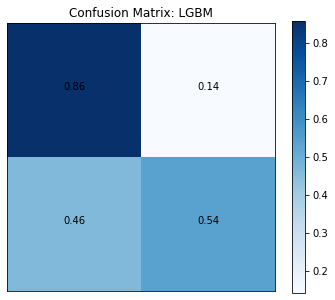

In [701]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Assuming y_test and y_pred are already defined as your true labels and predictions
accuracy = accuracy_score(y_test, pred5)
print(f'Accuracy: {accuracy:.4f}')
cm = confusion_matrix(y_test, pred5)

# Normalize confusion matrix
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot heatmap using matplotlib
plt.figure(figsize=(6, 5))
plt.imshow(cmn, interpolation='nearest', cmap='Blues')

# Add text annotations
for i in range(cmn.shape[0]):
    for j in range(cmn.shape[1]):
        plt.text(j, i, format(cmn[i, j], '.2f'), horizontalalignment="center", color="black")

plt.colorbar()
plt.title('Confusion Matrix: LGBM')

# Disable x and y ticks
plt.xticks([])
plt.yticks([])
plt.savefig("exp29.pdf", format="pdf", bbox_inches="tight",dpi=1000)
plt.show()

#  (a) FLAML: RF

In [745]:
from flaml import AutoML
automl1 = AutoML()
estimator_list = ['rf']
automl_settings = {
    "time_budget": 60,  # total running time in seconds
    "task": 'classification',  # task type
    "seed": 24545678,  # random seed
    "metric":  'f1',  # evaluation metric
    "estimator_list": estimator_list,  # specify the list of estimators
}
# Fit the AutoML model with the specified settings
automl1.fit(X_train=X_train, y_train=y_train, **automl_settings)
pred1=automl1.predict(X_test)

[flaml.automl: 07-31 11:47:26] {2599} INFO - task = classification
[flaml.automl: 07-31 11:47:26] {2601} INFO - Data split method: stratified
[flaml.automl: 07-31 11:47:26] {2604} INFO - Evaluation method: holdout
[flaml.automl: 07-31 11:47:26] {2726} INFO - Minimizing error metric: 1-f1
[flaml.automl: 07-31 11:47:26] {2870} INFO - List of ML learners in AutoML Run: ['rf']
[flaml.automl: 07-31 11:47:26] {3166} INFO - iteration 0, current learner rf
[flaml.automl: 07-31 11:47:26] {3296} INFO - Estimated sufficient time budget=870s. Estimated necessary time budget=1s.
[flaml.automl: 07-31 11:47:26] {3343} INFO -  at 0.5s,	estimator rf's best error=0.6253,	best estimator rf's best error=0.6253
[flaml.automl: 07-31 11:47:26] {3166} INFO - iteration 1, current learner rf
[flaml.automl: 07-31 11:47:26] {3343} INFO -  at 0.6s,	estimator rf's best error=0.6253,	best estimator rf's best error=0.6253
[flaml.automl: 07-31 11:47:26] {3166} INFO - iteration 2, current learner rf
[flaml.automl: 07-3

[flaml.automl: 07-31 11:47:34] {3166} INFO - iteration 38, current learner rf
[flaml.automl: 07-31 11:47:34] {3343} INFO -  at 8.6s,	estimator rf's best error=0.4142,	best estimator rf's best error=0.4142
[flaml.automl: 07-31 11:47:34] {3166} INFO - iteration 39, current learner rf
[flaml.automl: 07-31 11:47:34] {3343} INFO -  at 8.7s,	estimator rf's best error=0.4142,	best estimator rf's best error=0.4142
[flaml.automl: 07-31 11:47:34] {3166} INFO - iteration 40, current learner rf
[flaml.automl: 07-31 11:47:35] {3343} INFO -  at 9.0s,	estimator rf's best error=0.4142,	best estimator rf's best error=0.4142
[flaml.automl: 07-31 11:47:35] {3166} INFO - iteration 41, current learner rf
[flaml.automl: 07-31 11:47:35] {3343} INFO -  at 9.2s,	estimator rf's best error=0.4142,	best estimator rf's best error=0.4142
[flaml.automl: 07-31 11:47:35] {3166} INFO - iteration 42, current learner rf
[flaml.automl: 07-31 11:47:35] {3343} INFO -  at 9.5s,	estimator rf's best error=0.4142,	best estimato

[flaml.automl: 07-31 11:47:44] {3166} INFO - iteration 78, current learner rf
[flaml.automl: 07-31 11:47:45] {3343} INFO -  at 18.9s,	estimator rf's best error=0.4126,	best estimator rf's best error=0.4126
[flaml.automl: 07-31 11:47:45] {3166} INFO - iteration 79, current learner rf
[flaml.automl: 07-31 11:47:45] {3343} INFO -  at 19.1s,	estimator rf's best error=0.4126,	best estimator rf's best error=0.4126
[flaml.automl: 07-31 11:47:45] {3166} INFO - iteration 80, current learner rf
[flaml.automl: 07-31 11:47:45] {3343} INFO -  at 19.5s,	estimator rf's best error=0.4126,	best estimator rf's best error=0.4126
[flaml.automl: 07-31 11:47:45] {3166} INFO - iteration 81, current learner rf
[flaml.automl: 07-31 11:47:46] {3343} INFO -  at 19.8s,	estimator rf's best error=0.4126,	best estimator rf's best error=0.4126
[flaml.automl: 07-31 11:47:46] {3166} INFO - iteration 82, current learner rf
[flaml.automl: 07-31 11:47:46] {3343} INFO -  at 20.2s,	estimator rf's best error=0.4126,	best est

[flaml.automl: 07-31 11:48:00] {3166} INFO - iteration 118, current learner rf
[flaml.automl: 07-31 11:48:00] {3343} INFO -  at 34.3s,	estimator rf's best error=0.4064,	best estimator rf's best error=0.4064
[flaml.automl: 07-31 11:48:00] {3166} INFO - iteration 119, current learner rf
[flaml.automl: 07-31 11:48:00] {3343} INFO -  at 34.7s,	estimator rf's best error=0.4064,	best estimator rf's best error=0.4064
[flaml.automl: 07-31 11:48:00] {3166} INFO - iteration 120, current learner rf
[flaml.automl: 07-31 11:48:01] {3343} INFO -  at 35.2s,	estimator rf's best error=0.4064,	best estimator rf's best error=0.4064
[flaml.automl: 07-31 11:48:01] {3166} INFO - iteration 121, current learner rf
[flaml.automl: 07-31 11:48:01] {3343} INFO -  at 35.5s,	estimator rf's best error=0.4064,	best estimator rf's best error=0.4064
[flaml.automl: 07-31 11:48:01] {3166} INFO - iteration 122, current learner rf
[flaml.automl: 07-31 11:48:02] {3343} INFO -  at 36.3s,	estimator rf's best error=0.4064,	bes

[flaml.automl: 07-31 11:48:19] {3166} INFO - iteration 158, current learner rf
[flaml.automl: 07-31 11:48:19] {3343} INFO -  at 53.2s,	estimator rf's best error=0.4043,	best estimator rf's best error=0.4043
[flaml.automl: 07-31 11:48:19] {3166} INFO - iteration 159, current learner rf
[flaml.automl: 07-31 11:48:19] {3343} INFO -  at 53.7s,	estimator rf's best error=0.4043,	best estimator rf's best error=0.4043
[flaml.automl: 07-31 11:48:19] {3166} INFO - iteration 160, current learner rf
[flaml.automl: 07-31 11:48:20] {3343} INFO -  at 54.4s,	estimator rf's best error=0.4043,	best estimator rf's best error=0.4043
[flaml.automl: 07-31 11:48:20] {3166} INFO - iteration 161, current learner rf
[flaml.automl: 07-31 11:48:20] {3343} INFO -  at 54.7s,	estimator rf's best error=0.4043,	best estimator rf's best error=0.4043
[flaml.automl: 07-31 11:48:20] {3166} INFO - iteration 162, current learner rf
[flaml.automl: 07-31 11:48:21] {3343} INFO -  at 55.4s,	estimator rf's best error=0.4043,	bes

In [703]:
evaluation2(y_test,pred1)

Accuracy     0.738384
Precision    0.644654
Recall       0.584046
F1-score     0.612855


Accuracy: 0.7384
[[526 113]
 [146 205]]


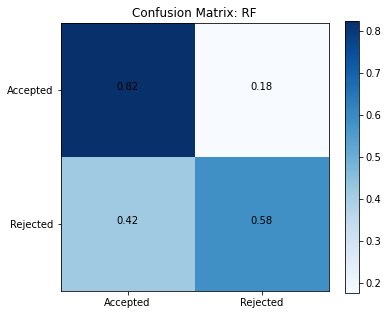

In [704]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Assuming y_test and y_pred are already defined as your true labels and predictions
accuracy = accuracy_score(y_test, pred1)
print(f'Accuracy: {accuracy:.4f}')
cm = confusion_matrix(y_test, pred1)
print(cm)
# Normalize confusion matrix
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot heatmap using matplotlib
plt.figure(figsize=(6, 5))
plt.imshow(cmn, interpolation='nearest', cmap='Blues')

# Add text annotations
for i in range(cmn.shape[0]):
    for j in range(cmn.shape[1]):
        plt.text(j, i, format(cmn[i, j], '.2f'), horizontalalignment="center", color="black")

plt.colorbar()
plt.title('Confusion Matrix: RF')
labels = ['Accepted', 'Rejected']
plt.xticks(ticks=np.arange(len(labels)), labels=labels)
plt.yticks(ticks=np.arange(len(labels)), labels=labels)

# Add axis labels
#plt.xlabel('Predicted labels')
#plt.ylabel('True labels')
plt.savefig("conf_rf2.pdf", format="pdf", bbox_inches="tight",dpi=1000)
plt.show()

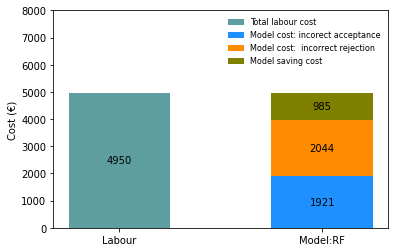

In [705]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = ['Labour', 'Model:RF']
subcategories = ['Total labour cost', 'Model cost: incorect acceptance', 
                 'Model cost:  incorrect rejection','Model saving cost']
values = np.array([
    [X_test.shape[0]*5, 0, 0,0],  # Category A
    [0, cm[0][1]*17,cm[1][0]*14,X_test.shape[0]*5-(cm[0][1]*17+cm[1][0]*14) ],  # Category B
])

# Custom colors
colors = ['#5F9EA0', '#1E90FF', '#FF8C00','#808000']  # You can use any valid color codes

# Create a figure and axis
fig, ax = plt.subplots()

# Create stacked bar plot
bar_width = 0.5
bar_positions = np.arange(len(categories))

bottom_values = np.zeros(len(categories))
for i, subcategory in enumerate(subcategories):
    bars = ax.bar(bar_positions, values[:, i], bar_width, label=subcategory, bottom=bottom_values, color=colors[i])
    bottom_values += values[:, i]
    
    # Add values inside each bar
    for bar in bars:
        height = bar.get_height()
        if height > 0: 
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # x position
                bar.get_y() + height / 2,           # y position (centered in the bar)
                f'{int(height)}',                   # text value
                ha='center',                        # horizontal alignment
                va='center',                        # vertical alignment
                color='black'
            )
        else: pass

# Add labels and title
ax.set_xticks(bar_positions)
ax.set_xticklabels(categories)
ax.set_ylim(0, 8000)  # Adjust as needed
ax.set_ylabel('Cost (€)')
#ax.set_title('Stacked Bar Plot with Custom Colors and Values')
ax.legend(frameon=False,fontsize=8)
# Show plot
plt.savefig("bar_rf2.pdf", format="pdf", bbox_inches="tight",dpi=1000)
plt.show()

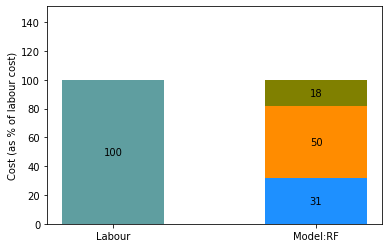

In [706]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = ['Labour', 'Model:RF']
subcategories = ['Total labour cost', 'Model cost: incorect acceptance (as % of total balour cost)', 
                 'Model cost:  incorrect rejection  (as % of total balour cost)','Model saving cost  (as % of total balour cost)']
values = np.array([
    [100, 0, 0,0],  # Category A
    [0, np.round(((cm[0][1]*14)/(X_test.shape[0]*5))*100,2),np.round(((cm[1][0]*17)/(X_test.shape[0]*5))*100),
     np.round(((X_test.shape[0]*5-(cm[0][1]*14+cm[1][0]*17))/(X_test.shape[0]*5))*100) ],  # Category B
])

# Custom colors
colors = ['#5F9EA0', '#1E90FF', '#FF8C00','#808000']  # You can use any valid color codes

# Create a figure and axis
fig, ax = plt.subplots()

# Create stacked bar plot
bar_width = 0.5
bar_positions = np.arange(len(categories))

bottom_values = np.zeros(len(categories))
for i, subcategory in enumerate(subcategories):
    bars = ax.bar(bar_positions, values[:, i], bar_width, bottom=bottom_values, color=colors[i])
    bottom_values += values[:, i]
    
    # Add values inside each bar
    for bar in bars:
        height = bar.get_height()
        if height > 0: 
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # x position
                bar.get_y() + height / 2,           # y position (centered in the bar)
                f'{int(height)}',                   # text value
                ha='center',                         # horizontal alignment
                va='center',                         # vertical alignment
                color='black'
            )
        else: pass

# Add labels and title
ax.set_xticks(bar_positions)
ax.set_xticklabels(categories)
ax.set_ylim(0, 151)  # Adjust as needed
ax.set_ylabel('Cost (as % of labour cost)')
# Show plot
plt.savefig("bar_rf2.pdf", format="pdf", bbox_inches="tight",dpi=1000)
plt.show()

#  (b) FLAML: XGBoost

In [746]:
from flaml import AutoML

automl2 = AutoML()
estimator_list = ['xgboost']
automl_settings = {
    "time_budget": 60,  # total running time in seconds
    "task": 'classification',  # task type
    "seed": 24545678,  # random seed
    "metric":  'f1',  # evaluation metric
    "estimator_list": estimator_list,  # specify the list of estimators
}
# Fit the AutoML model with the specified settings
automl2.fit(X_train=X_train, y_train=y_train, **automl_settings)
pred2=automl2.predict(X_test)

[flaml.automl: 07-31 11:48:26] {2599} INFO - task = classification
[flaml.automl: 07-31 11:48:26] {2601} INFO - Data split method: stratified
[flaml.automl: 07-31 11:48:26] {2604} INFO - Evaluation method: holdout
[flaml.automl: 07-31 11:48:26] {2726} INFO - Minimizing error metric: 1-f1
[flaml.automl: 07-31 11:48:26] {2870} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl: 07-31 11:48:26] {3166} INFO - iteration 0, current learner xgboost
[flaml.automl: 07-31 11:48:27] {3296} INFO - Estimated sufficient time budget=3301s. Estimated necessary time budget=3s.
[flaml.automl: 07-31 11:48:27] {3343} INFO -  at 0.7s,	estimator xgboost's best error=0.5798,	best estimator xgboost's best error=0.5798
[flaml.automl: 07-31 11:48:27] {3166} INFO - iteration 1, current learner xgboost
[flaml.automl: 07-31 11:48:27] {3343} INFO -  at 1.0s,	estimator xgboost's best error=0.5391,	best estimator xgboost's best error=0.5391
[flaml.automl: 07-31 11:48:27] {3166} INFO - iteration 2, cu

[flaml.automl: 07-31 11:48:54] {3166} INFO - iteration 35, current learner xgboost
[flaml.automl: 07-31 11:48:55] {3343} INFO -  at 29.4s,	estimator xgboost's best error=0.4161,	best estimator xgboost's best error=0.4161
[flaml.automl: 07-31 11:48:55] {3166} INFO - iteration 36, current learner xgboost
[flaml.automl: 07-31 11:48:56] {3343} INFO -  at 30.2s,	estimator xgboost's best error=0.4161,	best estimator xgboost's best error=0.4161
[flaml.automl: 07-31 11:48:56] {3166} INFO - iteration 37, current learner xgboost
[flaml.automl: 07-31 11:48:57] {3343} INFO -  at 31.0s,	estimator xgboost's best error=0.4161,	best estimator xgboost's best error=0.4161
[flaml.automl: 07-31 11:48:57] {3166} INFO - iteration 38, current learner xgboost
[flaml.automl: 07-31 11:48:58] {3343} INFO -  at 31.9s,	estimator xgboost's best error=0.4161,	best estimator xgboost's best error=0.4161
[flaml.automl: 07-31 11:48:58] {3166} INFO - iteration 39, current learner xgboost
[flaml.automl: 07-31 11:48:59] {3

[flaml.automl: 07-31 11:49:27] {2901} INFO - fit succeeded
[flaml.automl: 07-31 11:49:27] {2902} INFO - Time taken to find the best model: 28.339049100875854


In [708]:
evaluation2(y_test,pred2)

Accuracy     0.727273
Precision    0.631922
Recall       0.552707
F1-score     0.589666


Accuracy: 0.7273
[[526 113]
 [157 194]]


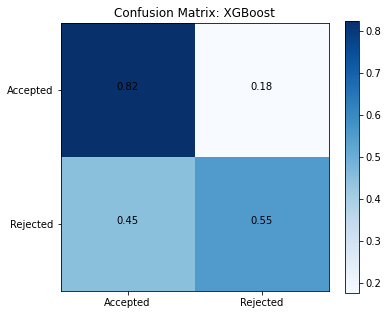

In [709]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Assuming y_test and y_pred are already defined as your true labels and predictions
accuracy = accuracy_score(y_test, pred2)
print(f'Accuracy: {accuracy:.4f}')
cm = confusion_matrix(y_test, pred2)
print(cm)
# Normalize confusion matrix
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot heatmap using matplotlib
plt.figure(figsize=(6, 5))
plt.imshow(cmn, interpolation='nearest', cmap='Blues')

# Add text annotations
for i in range(cmn.shape[0]):
    for j in range(cmn.shape[1]):
        plt.text(j, i, format(cmn[i, j], '.2f'), horizontalalignment="center", color="black")

plt.colorbar()
plt.title('Confusion Matrix: XGBoost')
labels = ['Accepted', 'Rejected']
plt.xticks(ticks=np.arange(len(labels)), labels=labels)
plt.yticks(ticks=np.arange(len(labels)), labels=labels)

# Add axis labels
#plt.xlabel('Predicted labels')
#plt.ylabel('True labels')
plt.savefig("conf_xgb2.pdf", format="pdf", bbox_inches="tight",dpi=1000)
plt.show()

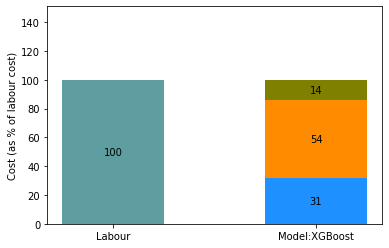

In [710]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = ['Labour', 'Model:XGBoost']
subcategories = ['Total labour cost', 'Model cost: incorect acceptance (as % of total balour cost)', 
                 'Model cost:  incorrect rejection  (as % of total balour cost)','Model saving cost  (as % of total balour cost)']
values = np.array([
    [100, 0, 0,0],  # Category A
    [0, np.round(((cm[0][1]*14)/(X_test.shape[0]*5))*100,2),np.round(((cm[1][0]*17)/(X_test.shape[0]*5))*100),
     np.round(((X_test.shape[0]*5-(cm[0][1]*14+cm[1][0]*17))/(X_test.shape[0]*5))*100) ],  # Category B
])

# Custom colors
colors = ['#5F9EA0', '#1E90FF', '#FF8C00','#808000']  # You can use any valid color codes

# Create a figure and axis
fig, ax = plt.subplots()

# Create stacked bar plot
bar_width = 0.5
bar_positions = np.arange(len(categories))

bottom_values = np.zeros(len(categories))
for i, subcategory in enumerate(subcategories):
    bars = ax.bar(bar_positions, values[:, i], bar_width, bottom=bottom_values, color=colors[i])
    bottom_values += values[:, i]
    
    # Add values inside each bar
    for bar in bars:
        height = bar.get_height()
        if height > 0: 
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # x position
                bar.get_y() + height / 2,           # y position (centered in the bar)
                f'{int(height)}',                   # text value
                ha='center',                         # horizontal alignment
                va='center',                         # vertical alignment
                color='black'
            )
        else: pass

# Add labels and title
ax.set_xticks(bar_positions)
ax.set_xticklabels(categories)
ax.set_ylim(0, 151)  # Adjust as needed
ax.set_ylabel('Cost (as % of labour cost)')
# Show plot
plt.savefig("bar_xgb2.pdf", format="pdf", bbox_inches="tight",dpi=1000)
plt.show()

# (c) FLAML: LGBM

In [747]:
from flaml import AutoML

automl3 = AutoML()
estimator_list = ['lgbm']
automl_settings = {
    "time_budget": 60,  # total running time in seconds
    "task": 'classification',  # task type
    "seed": 24545678,  # random seed
    "metric":  'f1',  # evaluation metric
    "estimator_list": estimator_list,  # specify the list of estimators
}
# Fit the AutoML model with the specified settings
automl3.fit(X_train=X_train, y_train=y_train, **automl_settings)
pred3=automl3.predict(X_test)

[flaml.automl: 07-31 11:49:27] {2599} INFO - task = classification
[flaml.automl: 07-31 11:49:27] {2601} INFO - Data split method: stratified
[flaml.automl: 07-31 11:49:27] {2604} INFO - Evaluation method: holdout
[flaml.automl: 07-31 11:49:28] {2726} INFO - Minimizing error metric: 1-f1
[flaml.automl: 07-31 11:49:28] {2870} INFO - List of ML learners in AutoML Run: ['lgbm']
[flaml.automl: 07-31 11:49:28] {3166} INFO - iteration 0, current learner lgbm
[flaml.automl: 07-31 11:49:28] {3296} INFO - Estimated sufficient time budget=850s. Estimated necessary time budget=1s.
[flaml.automl: 07-31 11:49:28] {3343} INFO -  at 1.3s,	estimator lgbm's best error=1.0000,	best estimator lgbm's best error=1.0000
[flaml.automl: 07-31 11:49:28] {3166} INFO - iteration 1, current learner lgbm
[flaml.automl: 07-31 11:49:28] {3343} INFO -  at 1.4s,	estimator lgbm's best error=1.0000,	best estimator lgbm's best error=1.0000
[flaml.automl: 07-31 11:49:28] {3166} INFO - iteration 2, current learner lgbm
[fl

[flaml.automl: 07-31 11:49:44] {3166} INFO - iteration 37, current learner lgbm
[flaml.automl: 07-31 11:49:45] {3343} INFO -  at 18.2s,	estimator lgbm's best error=0.4028,	best estimator lgbm's best error=0.4028
[flaml.automl: 07-31 11:49:45] {3166} INFO - iteration 38, current learner lgbm
[flaml.automl: 07-31 11:49:45] {3343} INFO -  at 18.4s,	estimator lgbm's best error=0.4028,	best estimator lgbm's best error=0.4028
[flaml.automl: 07-31 11:49:45] {3166} INFO - iteration 39, current learner lgbm
[flaml.automl: 07-31 11:49:46] {3343} INFO -  at 18.8s,	estimator lgbm's best error=0.4028,	best estimator lgbm's best error=0.4028
[flaml.automl: 07-31 11:49:46] {3166} INFO - iteration 40, current learner lgbm
[flaml.automl: 07-31 11:49:46] {3343} INFO -  at 19.2s,	estimator lgbm's best error=0.4028,	best estimator lgbm's best error=0.4028
[flaml.automl: 07-31 11:49:46] {3166} INFO - iteration 41, current learner lgbm
[flaml.automl: 07-31 11:49:46] {3343} INFO -  at 19.3s,	estimator lgbm's

[flaml.automl: 07-31 11:50:07] {3166} INFO - iteration 76, current learner lgbm
[flaml.automl: 07-31 11:50:07] {3343} INFO -  at 40.3s,	estimator lgbm's best error=0.4017,	best estimator lgbm's best error=0.4017
[flaml.automl: 07-31 11:50:07] {3166} INFO - iteration 77, current learner lgbm
[flaml.automl: 07-31 11:50:08] {3343} INFO -  at 40.7s,	estimator lgbm's best error=0.4017,	best estimator lgbm's best error=0.4017
[flaml.automl: 07-31 11:50:08] {3166} INFO - iteration 78, current learner lgbm
[flaml.automl: 07-31 11:50:08] {3343} INFO -  at 41.6s,	estimator lgbm's best error=0.4017,	best estimator lgbm's best error=0.4017
[flaml.automl: 07-31 11:50:08] {3166} INFO - iteration 79, current learner lgbm
[flaml.automl: 07-31 11:50:09] {3343} INFO -  at 41.9s,	estimator lgbm's best error=0.4017,	best estimator lgbm's best error=0.4017
[flaml.automl: 07-31 11:50:09] {3166} INFO - iteration 80, current learner lgbm
[flaml.automl: 07-31 11:50:09] {3343} INFO -  at 42.1s,	estimator lgbm's

In [712]:
evaluation2(y_test,pred3)

Accuracy     0.752525
Precision    0.672078
Recall       0.589744
F1-score     0.628225


Accuracy: 0.7525
[[538 101]
 [144 207]]


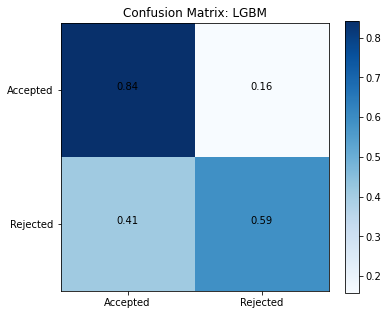

In [713]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Assuming y_test and y_pred are already defined as your true labels and predictions
accuracy = accuracy_score(y_test, pred3)
print(f'Accuracy: {accuracy:.4f}')
cm = confusion_matrix(y_test, pred3)
print(cm)
# Normalize confusion matrix
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot heatmap using matplotlib
plt.figure(figsize=(6, 5))
plt.imshow(cmn, interpolation='nearest', cmap='Blues')

# Add text annotations
for i in range(cmn.shape[0]):
    for j in range(cmn.shape[1]):
        plt.text(j, i, format(cmn[i, j], '.2f'), horizontalalignment="center", color="black")

plt.colorbar()
plt.title('Confusion Matrix: LGBM')
labels = ['Accepted', 'Rejected']
plt.xticks(ticks=np.arange(len(labels)), labels=labels)
plt.yticks(ticks=np.arange(len(labels)), labels=labels)

# Add axis labels
#plt.xlabel('Predicted labels')
#plt.ylabel('True labels')
plt.savefig("conf_lgbm2.pdf", format="pdf", bbox_inches="tight",dpi=1000)
plt.show()

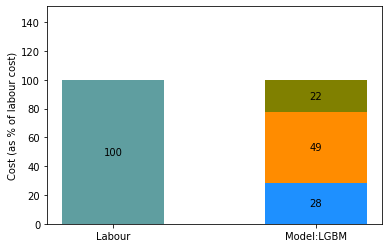

In [714]:
import matplotlib.pyplot as plt
import numpy as np
# Sample data
categories = ['Labour', 'Model:LGBM']
subcategories = ['Total labour cost', 'Model cost: incorect acceptance (as % of total balour cost)', 
                 'Model cost:  incorrect rejection  (as % of total balour cost)','Model saving cost  (as % of total balour cost)']
values = np.array([
    [100, 0, 0,0],  # Category A
    [0, np.round(((cm[0][1]*14)/(X_test.shape[0]*5))*100,2),np.round(((cm[1][0]*17)/(X_test.shape[0]*5))*100),
     np.round(((X_test.shape[0]*5-(cm[0][1]*14+cm[1][0]*17))/(X_test.shape[0]*5))*100) ],  # Category B
])

# Custom colors
colors = ['#5F9EA0', '#1E90FF', '#FF8C00','#808000']  # You can use any valid color codes

# Create a figure and axis
fig, ax = plt.subplots()

# Create stacked bar plot
bar_width = 0.5
bar_positions = np.arange(len(categories))

bottom_values = np.zeros(len(categories))
for i, subcategory in enumerate(subcategories):
    bars = ax.bar(bar_positions, values[:, i], bar_width, bottom=bottom_values, color=colors[i])
    bottom_values += values[:, i]
    
    # Add values inside each bar
    for bar in bars:
        height = bar.get_height()
        if height > 0: 
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # x position
                bar.get_y() + height / 2,           # y position (centered in the bar)
                f'{int(height)}',                   # text value
                ha='center',                         # horizontal alignment
                va='center',                         # vertical alignment
                color='black'
            )
        else: pass

# Add labels and title
ax.set_xticks(bar_positions)
ax.set_xticklabels(categories)
ax.set_ylim(0, 151)  # Adjust as needed
ax.set_ylabel('Cost (as % of labour cost)')
#ax.set_title('Stacked Bar Plot with Custom Colors and Values')
# Show plot
plt.savefig("bar_lgbm2.pdf", format="pdf", bbox_inches="tight",dpi=1000)
plt.show()

In [715]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# (d) Optuna: LGBM

In [716]:
#!pip install --upgrade typing_extensions

import lightgbm as lgb
import optuna
from sklearn.metrics import accuracy_score

In [739]:
import lightgbm as lgb
import optuna
from sklearn.metrics import accuracy_score

def objective(trial):
    params = {
        'objective': 'binary',
        'metric': 'binary_error',
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart']),
        'num_leaves': trial.suggest_int('num_leaves', 20, 400),
        'max_depth': trial.suggest_int('max_depth', 3, 30),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e2),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.1, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 30),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 200),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-5, 1e5)
    }

    # Create LightGBM datasets
    train_set = lgb.Dataset(X_train, y_train, silent=False)
    valid_set = lgb.Dataset(X_test, y_test, silent=False, reference=train_set)

    # Train the model
    model = lgb.train(
        params,
        train_set=train_set,
        num_boost_round=30000,
        early_stopping_rounds=500,
        verbose_eval=500,
        valid_sets=[valid_set]
    )

    # Predict on the test set
    y_pred_prob = model.predict(X_test, num_iteration=model.best_iteration)
    y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

study = optuna.create_study(direction='maximize')  # For maximizing accuracy
study.optimize(objective, n_trials=500)  # You can adjust the number of trials

print("Best hyperparameters: ", study.best_params)
print("Best accuracy: ", study.best_value)

In [740]:
# Create LightGBM datasets
train_set = lgb.Dataset(X_train, label=y_train)
valid_set = lgb.Dataset(X_test, label=y_test, reference=train_set)

# Define model parameters
params = {
    'boosting_type': 'gbdt',
    'num_leaves': 70,
    'max_depth': 25,
    'learning_rate': 0.004796225126978845,
    'feature_fraction': 0.6036416679573813,
    'bagging_fraction': 0.7102057400975744,
    'bagging_freq': 5,
    'min_data_in_leaf': 188,
    'reg_lambda': 25.867047720071138,
    'objective': 'binary',  # Assuming binary classification
    'metric': 'binary_error'  # You can choose the metric that fits your needs
}

# Train the model
model = lgb.train(
    params,
    train_set,
    num_boost_round=100000,  # Number of boosting rounds
    early_stopping_rounds=1000,  # Stop if no improvement in 500 rounds
    valid_sets=[valid_set],
    verbose_eval=1000  # Print evaluation every 500 rounds
)

# Predict on the test set
y_pred_prob = model.predict(X_test, num_iteration=model.best_iteration)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Training until validation scores don't improve for 1000 rounds
[1000]	valid_0's binary_error: 0.277778
[2000]	valid_0's binary_error: 0.247475
[3000]	valid_0's binary_error: 0.248485
[4000]	valid_0's binary_error: 0.246465
Early stopping, best iteration is:
[3221]	valid_0's binary_error: 0.245455
Accuracy: 0.7545


In [741]:
y_pred_prob = model.predict(X_test, num_iteration=model.best_iteration)
pred4 = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

In [742]:
evaluation2(y_test,pred4)

Accuracy     0.754545
Precision    0.675325
Recall       0.592593
F1-score     0.631259


Accuracy: 0.7545


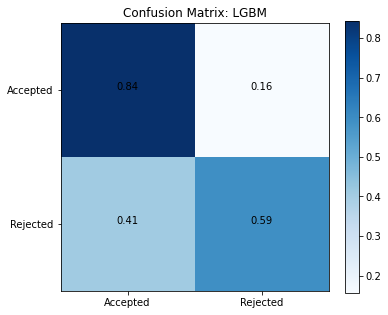

In [743]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Assuming y_test and y_pred are already defined as your true labels and predictions
accuracy = accuracy_score(y_test, pred4)
print(f'Accuracy: {accuracy:.4f}')
cm = confusion_matrix(y_test, pred4)

# Normalize confusion matrix
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot heatmap using matplotlib
plt.figure(figsize=(6, 5))
plt.imshow(cmn, interpolation='nearest', cmap='Blues')

# Add text annotations
for i in range(cmn.shape[0]):
    for j in range(cmn.shape[1]):
        plt.text(j, i, format(cmn[i, j], '.2f'), horizontalalignment="center", color="black")

plt.colorbar()
plt.title('Confusion Matrix: LGBM')
labels = ['Accepted', 'Rejected']
plt.xticks(ticks=np.arange(len(labels)), labels=labels)
plt.yticks(ticks=np.arange(len(labels)), labels=labels)

# Add axis labels
#plt.xlabel('Predicted labels')
#plt.ylabel('True labels')
plt.savefig("conf_lgbm_optuna2.pdf", format="pdf", bbox_inches="tight",dpi=1000)
plt.show()

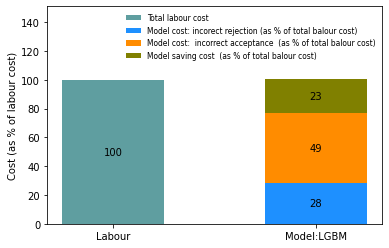

In [744]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = ['Labour', 'Model:LGBM']
subcategories = ['Total labour cost', 'Model cost: incorect rejection (as % of total balour cost)', 
                 'Model cost:  incorrect acceptance  (as % of total balour cost)','Model saving cost  (as % of total balour cost)']
values = np.array([
    [100, 0, 0,0],  # Category A
    [0, np.round(((cm[0][1]*14)/(X_test.shape[0]*5))*100,2),np.round(((cm[1][0]*17)/(X_test.shape[0]*5))*100),
     np.round(((X_test.shape[0]*5-(cm[0][1]*14+cm[1][0]*17))/(X_test.shape[0]*5))*100) ],  # Category B
])

# Custom colors
colors = ['#5F9EA0', '#1E90FF', '#FF8C00','#808000']  # You can use any valid color codes

# Create a figure and axis
fig, ax = plt.subplots()

# Create stacked bar plot
bar_width = 0.5
bar_positions = np.arange(len(categories))

bottom_values = np.zeros(len(categories))
for i, subcategory in enumerate(subcategories):
    bars = ax.bar(bar_positions, values[:, i], bar_width, label=subcategory, bottom=bottom_values, color=colors[i])
    bottom_values += values[:, i]
    
    # Add values inside each bar
    for bar in bars:
        height = bar.get_height()
        if height > 0: 
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # x position
                bar.get_y() + height / 2,           # y position (centered in the bar)
                f'{int(height)}',                   # text value
                ha='center',                         # horizontal alignment
                va='center',                         # vertical alignment
                color='black'
            )
        else: pass

# Add labels and title
ax.set_xticks(bar_positions)
ax.set_xticklabels(categories)
ax.set_ylim(0, 151)  # Adjust as needed
ax.set_ylabel('Cost (as % of labour cost)')
#ax.set_title('Stacked Bar Plot with Custom Colors and Values')
ax.legend(frameon=False,fontsize=7.5)
# Show plot
plt.savefig("bar_lgbm_optuna2.pdf", format="pdf", bbox_inches="tight",dpi=1000)
plt.show()

# Ensemble

In [723]:
X_data=np.array([[pred1[i],pred2[i], pred4[i]] for i in range(len(pred3))])
y_data= y_test

In [748]:
from flaml import AutoML
automl = AutoML()
#estimator_list = ['rf','lgbm','extra_tree']
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 100,  # total running time in seconds
    "task": 'classification',  # task type
    "seed": 24545678,  # random seed
    "metric" : 'f1',
 #"estimator_list": estimator_list,  # specify the list of estimators
}

automl.fit(X_train=X_data, y_train=y_data, **automl_settings)

[flaml.automl: 07-31 11:50:27] {2599} INFO - task = classification
[flaml.automl: 07-31 11:50:27] {2601} INFO - Data split method: stratified
[flaml.automl: 07-31 11:50:27] {2604} INFO - Evaluation method: cv
[flaml.automl: 07-31 11:50:27] {2726} INFO - Minimizing error metric: 1-f1
[flaml.automl: 07-31 11:50:27] {2870} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 07-31 11:50:27] {3166} INFO - iteration 0, current learner lgbm
[flaml.automl: 07-31 11:50:27] {3296} INFO - Estimated sufficient time budget=814s. Estimated necessary time budget=19s.
[flaml.automl: 07-31 11:50:27] {3343} INFO -  at 0.1s,	estimator lgbm's best error=1.0000,	best estimator lgbm's best error=1.0000
[flaml.automl: 07-31 11:50:27] {3166} INFO - iteration 1, current learner lgbm
[flaml.automl: 07-31 11:50:28] {3343} INFO -  at 0.2s,	estimator lgbm's best error=1.0000,	best estimator lgbm's best error=1.0000
[flaml.automl: 07-31 11:50:28

[flaml.automl: 07-31 11:50:34] {3166} INFO - iteration 36, current learner extra_tree
[flaml.automl: 07-31 11:50:34] {3343} INFO -  at 6.8s,	estimator extra_tree's best error=0.3540,	best estimator rf's best error=0.3473
[flaml.automl: 07-31 11:50:34] {3166} INFO - iteration 37, current learner xgboost
[flaml.automl: 07-31 11:50:34] {3343} INFO -  at 6.8s,	estimator xgboost's best error=0.3627,	best estimator rf's best error=0.3473
[flaml.automl: 07-31 11:50:34] {3166} INFO - iteration 38, current learner xgboost
[flaml.automl: 07-31 11:50:34] {3343} INFO -  at 6.9s,	estimator xgboost's best error=0.3627,	best estimator rf's best error=0.3473
[flaml.automl: 07-31 11:50:34] {3166} INFO - iteration 39, current learner rf
[flaml.automl: 07-31 11:50:35] {3343} INFO -  at 7.4s,	estimator rf's best error=0.3473,	best estimator rf's best error=0.3473
[flaml.automl: 07-31 11:50:35] {3166} INFO - iteration 40, current learner xgboost
[flaml.automl: 07-31 11:50:35] {3343} INFO -  at 7.4s,	estima

[flaml.automl: 07-31 11:50:41] {3166} INFO - iteration 75, current learner rf
[flaml.automl: 07-31 11:50:41] {3343} INFO -  at 13.9s,	estimator rf's best error=0.3368,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:50:41] {3166} INFO - iteration 76, current learner rf
[flaml.automl: 07-31 11:50:42] {3343} INFO -  at 14.4s,	estimator rf's best error=0.3368,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:50:42] {3166} INFO - iteration 77, current learner xgboost
[flaml.automl: 07-31 11:50:42] {3343} INFO -  at 14.4s,	estimator xgboost's best error=0.3627,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:50:42] {3166} INFO - iteration 78, current learner rf
[flaml.automl: 07-31 11:50:42] {3343} INFO -  at 14.8s,	estimator rf's best error=0.3368,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:50:42] {3166} INFO - iteration 79, current learner rf
[flaml.automl: 07-31 11:50:42] {3343} INFO -  at 15.0s,	estimator rf's best error=0.3368

[flaml.automl: 07-31 11:50:48] {3343} INFO -  at 21.1s,	estimator xgb_limitdepth's best error=0.3656,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:50:48] {3166} INFO - iteration 114, current learner xgb_limitdepth
[flaml.automl: 07-31 11:50:49] {3343} INFO -  at 21.2s,	estimator xgb_limitdepth's best error=0.3656,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:50:49] {3166} INFO - iteration 115, current learner rf
[flaml.automl: 07-31 11:50:49] {3343} INFO -  at 21.4s,	estimator rf's best error=0.3368,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:50:49] {3166} INFO - iteration 116, current learner rf
[flaml.automl: 07-31 11:50:49] {3343} INFO -  at 21.8s,	estimator rf's best error=0.3368,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:50:49] {3166} INFO - iteration 117, current learner xgb_limitdepth
[flaml.automl: 07-31 11:50:49] {3343} INFO -  at 21.9s,	estimator xgb_limitdepth's best error=0.3656,	best estimator rf's be

[flaml.automl: 07-31 11:50:55] {3343} INFO -  at 27.2s,	estimator rf's best error=0.3368,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:50:55] {3166} INFO - iteration 152, current learner xgboost
[flaml.automl: 07-31 11:50:55] {3343} INFO -  at 27.3s,	estimator xgboost's best error=0.3627,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:50:55] {3166} INFO - iteration 153, current learner xgboost
[flaml.automl: 07-31 11:50:55] {3343} INFO -  at 27.3s,	estimator xgboost's best error=0.3627,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:50:55] {3166} INFO - iteration 154, current learner lgbm
[flaml.automl: 07-31 11:50:55] {3343} INFO -  at 27.5s,	estimator lgbm's best error=0.3648,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:50:55] {3166} INFO - iteration 155, current learner lgbm
[flaml.automl: 07-31 11:50:55] {3343} INFO -  at 27.6s,	estimator lgbm's best error=0.3648,	best estimator rf's best error=0.3368
[flaml.automl: 0

[flaml.automl: 07-31 11:51:01] {3343} INFO -  at 33.6s,	estimator rf's best error=0.3368,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:01] {3166} INFO - iteration 190, current learner xgb_limitdepth
[flaml.automl: 07-31 11:51:01] {3343} INFO -  at 33.7s,	estimator xgb_limitdepth's best error=0.3571,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:01] {3166} INFO - iteration 191, current learner rf
[flaml.automl: 07-31 11:51:01] {3343} INFO -  at 34.0s,	estimator rf's best error=0.3368,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:01] {3166} INFO - iteration 192, current learner extra_tree
[flaml.automl: 07-31 11:51:02] {3343} INFO -  at 34.3s,	estimator extra_tree's best error=0.3501,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:02] {3166} INFO - iteration 193, current learner xgboost
[flaml.automl: 07-31 11:51:02] {3343} INFO -  at 34.4s,	estimator xgboost's best error=0.3627,	best estimator rf's best error=0

[flaml.automl: 07-31 11:51:06] {3166} INFO - iteration 227, current learner lrl1
[flaml.automl: 07-31 11:51:06] {3343} INFO -  at 38.5s,	estimator lrl1's best error=0.4007,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:06] {3166} INFO - iteration 228, current learner lrl1
[flaml.automl: 07-31 11:51:06] {3343} INFO -  at 38.6s,	estimator lrl1's best error=0.4007,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:06] {3166} INFO - iteration 229, current learner lrl1
[flaml.automl: 07-31 11:51:06] {3343} INFO -  at 38.7s,	estimator lrl1's best error=0.4007,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:06] {3166} INFO - iteration 230, current learner lrl1
[flaml.automl: 07-31 11:51:06] {3343} INFO -  at 38.8s,	estimator lrl1's best error=0.4007,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:06] {3166} INFO - iteration 231, current learner lrl1
[flaml.automl: 07-31 11:51:06] {3343} INFO -  at 38.9s,	estimator lrl1's be

[flaml.automl: 07-31 11:51:10] {3166} INFO - iteration 266, current learner lrl1
[flaml.automl: 07-31 11:51:10] {3343} INFO -  at 42.8s,	estimator lrl1's best error=0.4007,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:10] {3166} INFO - iteration 267, current learner lrl1
[flaml.automl: 07-31 11:51:10] {3343} INFO -  at 42.9s,	estimator lrl1's best error=0.4007,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:10] {3166} INFO - iteration 268, current learner lrl1
[flaml.automl: 07-31 11:51:10] {3343} INFO -  at 43.1s,	estimator lrl1's best error=0.4007,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:10] {3166} INFO - iteration 269, current learner lrl1
[flaml.automl: 07-31 11:51:11] {3343} INFO -  at 43.2s,	estimator lrl1's best error=0.4007,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:11] {3166} INFO - iteration 270, current learner lrl1
[flaml.automl: 07-31 11:51:11] {3343} INFO -  at 43.3s,	estimator lrl1's be

[flaml.automl: 07-31 11:51:15] {3343} INFO -  at 48.1s,	estimator lrl1's best error=0.4007,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:15] {3166} INFO - iteration 305, current learner rf
[flaml.automl: 07-31 11:51:16] {3343} INFO -  at 48.4s,	estimator rf's best error=0.3368,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:16] {3166} INFO - iteration 306, current learner lrl1
[flaml.automl: 07-31 11:51:16] {3343} INFO -  at 48.5s,	estimator lrl1's best error=0.4007,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:16] {3166} INFO - iteration 307, current learner lrl1
[flaml.automl: 07-31 11:51:16] {3343} INFO -  at 48.6s,	estimator lrl1's best error=0.4007,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:16] {3166} INFO - iteration 308, current learner lrl1
[flaml.automl: 07-31 11:51:16] {3343} INFO -  at 48.7s,	estimator lrl1's best error=0.4007,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:16]

[flaml.automl: 07-31 11:51:22] {3166} INFO - iteration 343, current learner lrl1
[flaml.automl: 07-31 11:51:22] {3343} INFO -  at 54.6s,	estimator lrl1's best error=0.4007,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:22] {3166} INFO - iteration 344, current learner lrl1
[flaml.automl: 07-31 11:51:22] {3343} INFO -  at 54.7s,	estimator lrl1's best error=0.4007,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:22] {3166} INFO - iteration 345, current learner xgb_limitdepth
[flaml.automl: 07-31 11:51:22] {3343} INFO -  at 54.8s,	estimator xgb_limitdepth's best error=0.3551,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:22] {3166} INFO - iteration 346, current learner lrl1
[flaml.automl: 07-31 11:51:22] {3343} INFO -  at 54.9s,	estimator lrl1's best error=0.4007,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:22] {3166} INFO - iteration 347, current learner lrl1
[flaml.automl: 07-31 11:51:22] {3343} INFO -  at 55.0s,

[flaml.automl: 07-31 11:51:27] {3343} INFO -  at 59.4s,	estimator xgboost's best error=0.3627,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:27] {3166} INFO - iteration 382, current learner lrl1
[flaml.automl: 07-31 11:51:27] {3343} INFO -  at 59.5s,	estimator lrl1's best error=0.4007,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:27] {3166} INFO - iteration 383, current learner lrl1
[flaml.automl: 07-31 11:51:27] {3343} INFO -  at 59.6s,	estimator lrl1's best error=0.4007,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:27] {3166} INFO - iteration 384, current learner lrl1
[flaml.automl: 07-31 11:51:27] {3343} INFO -  at 59.7s,	estimator lrl1's best error=0.4007,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:27] {3166} INFO - iteration 385, current learner rf
[flaml.automl: 07-31 11:51:27] {3343} INFO -  at 60.0s,	estimator rf's best error=0.3368,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:

[flaml.automl: 07-31 11:51:34] {3343} INFO -  at 66.2s,	estimator xgb_limitdepth's best error=0.3551,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:34] {3166} INFO - iteration 420, current learner lrl1
[flaml.automl: 07-31 11:51:34] {3343} INFO -  at 66.3s,	estimator lrl1's best error=0.4007,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:34] {3166} INFO - iteration 421, current learner extra_tree
[flaml.automl: 07-31 11:51:34] {3343} INFO -  at 66.4s,	estimator extra_tree's best error=0.3416,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:34] {3166} INFO - iteration 422, current learner lrl1
[flaml.automl: 07-31 11:51:34] {3343} INFO -  at 66.5s,	estimator lrl1's best error=0.4007,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:34] {3166} INFO - iteration 423, current learner extra_tree
[flaml.automl: 07-31 11:51:34] {3343} INFO -  at 66.8s,	estimator extra_tree's best error=0.3416,	best estimator rf's best error

[flaml.automl: 07-31 11:51:42] {3166} INFO - iteration 458, current learner lrl1
[flaml.automl: 07-31 11:51:42] {3343} INFO -  at 74.5s,	estimator lrl1's best error=0.4007,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:42] {3166} INFO - iteration 459, current learner lrl1
[flaml.automl: 07-31 11:51:42] {3343} INFO -  at 74.6s,	estimator lrl1's best error=0.4007,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:42] {3166} INFO - iteration 460, current learner lrl1
[flaml.automl: 07-31 11:51:42] {3343} INFO -  at 74.7s,	estimator lrl1's best error=0.4007,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:42] {3166} INFO - iteration 461, current learner lrl1
[flaml.automl: 07-31 11:51:42] {3343} INFO -  at 74.9s,	estimator lrl1's best error=0.4007,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:42] {3166} INFO - iteration 462, current learner lrl1
[flaml.automl: 07-31 11:51:42] {3343} INFO -  at 75.0s,	estimator lrl1's be

[flaml.automl: 07-31 11:51:48] {3343} INFO -  at 80.5s,	estimator extra_tree's best error=0.3416,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:48] {3166} INFO - iteration 497, current learner lrl1
[flaml.automl: 07-31 11:51:48] {3343} INFO -  at 80.6s,	estimator lrl1's best error=0.4007,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:48] {3166} INFO - iteration 498, current learner extra_tree
[flaml.automl: 07-31 11:51:48] {3343} INFO -  at 81.0s,	estimator extra_tree's best error=0.3416,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:48] {3166} INFO - iteration 499, current learner xgboost
[flaml.automl: 07-31 11:51:48] {3343} INFO -  at 81.1s,	estimator xgboost's best error=0.3627,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:48] {3166} INFO - iteration 500, current learner xgboost
[flaml.automl: 07-31 11:51:48] {3343} INFO -  at 81.1s,	estimator xgboost's best error=0.3627,	best estimator rf's best error=0.3

[flaml.automl: 07-31 11:51:55] {3166} INFO - iteration 535, current learner xgboost
[flaml.automl: 07-31 11:51:55] {3343} INFO -  at 87.5s,	estimator xgboost's best error=0.3627,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:55] {3166} INFO - iteration 536, current learner lrl1
[flaml.automl: 07-31 11:51:55] {3343} INFO -  at 87.6s,	estimator lrl1's best error=0.4007,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:55] {3166} INFO - iteration 537, current learner rf
[flaml.automl: 07-31 11:51:55] {3343} INFO -  at 87.8s,	estimator rf's best error=0.3368,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:55] {3166} INFO - iteration 538, current learner lrl1
[flaml.automl: 07-31 11:51:55] {3343} INFO -  at 87.9s,	estimator lrl1's best error=0.4007,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:51:55] {3166} INFO - iteration 539, current learner lrl1
[flaml.automl: 07-31 11:51:55] {3343} INFO -  at 88.0s,	estimator lrl1's 

[flaml.automl: 07-31 11:52:01] {3166} INFO - iteration 573, current learner lrl1
[flaml.automl: 07-31 11:52:01] {3343} INFO -  at 93.6s,	estimator lrl1's best error=0.4007,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:52:01] {3166} INFO - iteration 574, current learner xgb_limitdepth
[flaml.automl: 07-31 11:52:01] {3343} INFO -  at 93.7s,	estimator xgb_limitdepth's best error=0.3551,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:52:01] {3166} INFO - iteration 575, current learner lgbm
[flaml.automl: 07-31 11:52:01] {3343} INFO -  at 93.8s,	estimator lgbm's best error=0.3627,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:52:01] {3166} INFO - iteration 576, current learner extra_tree
[flaml.automl: 07-31 11:52:01] {3343} INFO -  at 94.1s,	estimator extra_tree's best error=0.3416,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:52:01] {3166} INFO - iteration 577, current learner lrl1
[flaml.automl: 07-31 11:52:02] {3343} INFO 

[flaml.automl: 07-31 11:52:07] {3343} INFO -  at 99.4s,	estimator lrl1's best error=0.4007,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:52:07] {3166} INFO - iteration 612, current learner lrl1
[flaml.automl: 07-31 11:52:07] {3343} INFO -  at 99.5s,	estimator lrl1's best error=0.4007,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:52:07] {3166} INFO - iteration 613, current learner extra_tree
[flaml.automl: 07-31 11:52:07] {3343} INFO -  at 99.7s,	estimator extra_tree's best error=0.3416,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:52:07] {3166} INFO - iteration 614, current learner extra_tree
[flaml.automl: 07-31 11:52:07] {3343} INFO -  at 99.9s,	estimator extra_tree's best error=0.3416,	best estimator rf's best error=0.3368
[flaml.automl: 07-31 11:52:07] {3166} INFO - iteration 615, current learner lrl1
[flaml.automl: 07-31 11:52:07] {3343} INFO -  at 100.0s,	estimator lrl1's best error=0.4007,	best estimator rf's best error=0.3368
[

In [725]:
pred=automl.predict(X_data)
evaluation2(y_test,pred)

Accuracy     0.744444
Precision    0.619512
Recall       0.723647
F1-score     0.667543


Accuracy: 0.7444


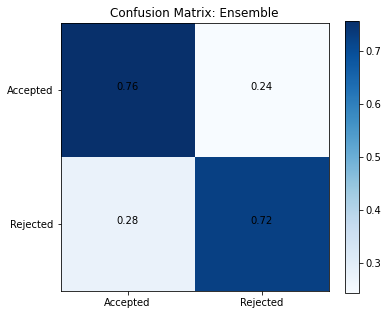

In [726]:
pred=automl.predict(X_data)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Assuming y_test and y_pred are already defined as your true labels and predictions
accuracy = accuracy_score(y_test, pred)
print(f'Accuracy: {accuracy:.4f}')
cm = confusion_matrix(y_test, pred)

# Normalize confusion matrix
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot heatmap using matplotlib
plt.figure(figsize=(6, 5))
plt.imshow(cmn, interpolation='nearest', cmap='Blues')

# Add text annotations
for i in range(cmn.shape[0]):
    for j in range(cmn.shape[1]):
        plt.text(j, i, format(cmn[i, j], '.2f'), horizontalalignment="center", color="black")

plt.colorbar()
plt.title('Confusion Matrix: Ensemble')
labels = ['Accepted', 'Rejected']
plt.xticks(ticks=np.arange(len(labels)), labels=labels)
plt.yticks(ticks=np.arange(len(labels)), labels=labels)

# Add axis labels
#plt.xlabel('Predicted labels')
#plt.ylabel('True labels')
plt.savefig("conf_ensemble2.pdf", format="pdf", bbox_inches="tight",dpi=1000)
plt.show()

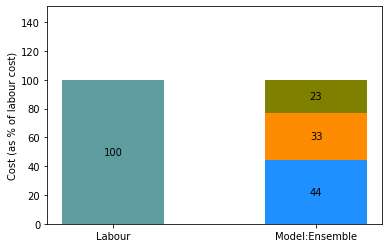

In [727]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = ['Labour', 'Model:Ensemble']
subcategories = ['Total labour cost', 'Model cost: incorect acceptance (as % of total balour cost)', 
                 'Model cost:  incorrect rejection  (as % of total balour cost)','Model saving cost  (as % of total balour cost)']
values = np.array([
    [100, 0, 0,0],  # Category A
    [0, np.round(((cm[0][1]*14)/(X_test.shape[0]*5))*100,2),np.round(((cm[1][0]*17)/(X_test.shape[0]*5))*100),
     np.round(((X_test.shape[0]*5-(cm[0][1]*14+cm[1][0]*17))/(X_test.shape[0]*5))*100) ],  # Category B
])

# Custom colors
colors = ['#5F9EA0', '#1E90FF', '#FF8C00','#808000']  # You can use any valid color codes

# Create a figure and axis
fig, ax = plt.subplots()

# Create stacked bar plot
bar_width = 0.5
bar_positions = np.arange(len(categories))

bottom_values = np.zeros(len(categories))
for i, subcategory in enumerate(subcategories):
    bars = ax.bar(bar_positions, values[:, i], bar_width, bottom=bottom_values, color=colors[i])
    bottom_values += values[:, i]
    
    # Add values inside each bar
    for bar in bars:
        height = bar.get_height()
        if height > 0: 
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # x position
                bar.get_y() + height / 2,           # y position (centered in the bar)
                f'{int(height)}',                   # text value
                ha='center',                         # horizontal alignment
                va='center',                         # vertical alignment
                color='black'
            )
        else: pass

# Add labels and title
ax.set_xticks(bar_positions)
ax.set_xticklabels(categories)
ax.set_ylim(0, 151)  # Adjust as needed
ax.set_ylabel('Cost (as % of labour cost)')
#ax.set_title('Stacked Bar Plot with Custom Colors and Values')
# Show plot
plt.savefig("bar_ensemble2.pdf", format="pdf", bbox_inches="tight",dpi=1000)
plt.show()

In [728]:
evaluation1(y_test,pred1)[0]

0.7383838383838384

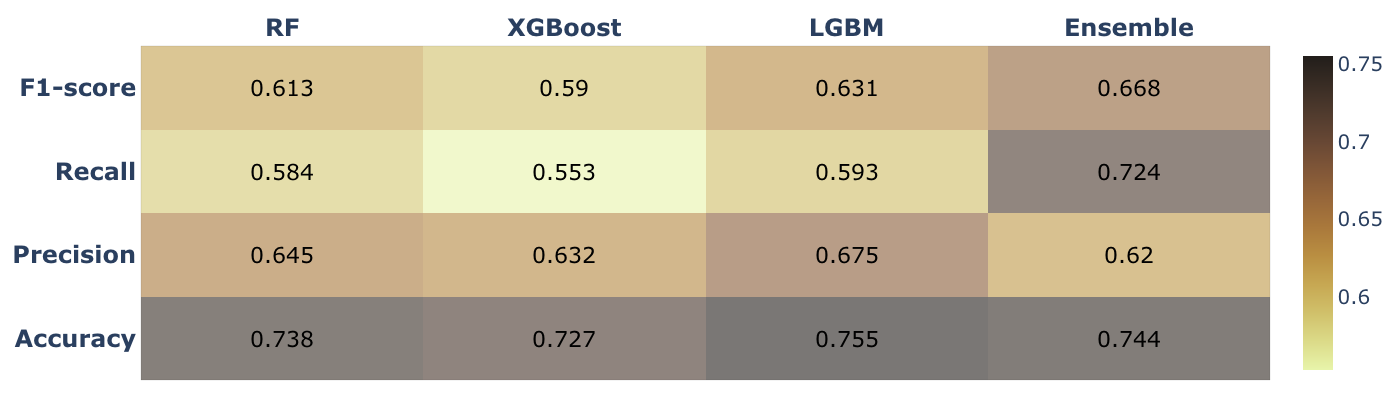

In [729]:
import numpy as np
import plotly.graph_objects as go
from functools import reduce
from itertools import product
from IPython.display import Image
SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
SUP = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")
z=[[np.round(evaluation1(y_test,pred1)[0],3),np.round(evaluation1(y_test,pred2)[0],3),
    np.round(evaluation1(y_test,pred4)[0],3),np.round(evaluation1(y_test,pred)[0],3)],
   
   [np.round(evaluation1(y_test,pred1)[1],3),np.round(evaluation1(y_test,pred2)[1],3),
    np.round(evaluation1(y_test,pred4)[1],3),np.round(evaluation1(y_test,pred)[1],3)],
   
   [np.round(evaluation1(y_test,pred1)[2],3),np.round(evaluation1(y_test,pred2)[2],3),
    np.round(evaluation1(y_test,pred4)[2],3),np.round(evaluation1(y_test,pred)[2],3)],
   
   [np.round(evaluation1(y_test,pred1)[3],3),np.round(evaluation1(y_test,pred2)[3],3),
   np.round(evaluation1(y_test,pred4)[3],3), np.round(evaluation1(y_test,pred)[3],3)]]

x=['<b>RF</b>', '<b>XGBoost</b>',  '<b>LGBM</b>', '<b>Ensemble</b>']
y=['<b>Accuracy</b>','<b>Precision</b>','<b>Recall</b>','<b>F1-score</b>']

def get_anno_text(z_value):
    annotations=[]
    a, b = len(z_value), len(z_value[0])
    flat_z = reduce(lambda x,y: x+y, z_value) # z_value.flat if you deal with numpy
    coords = product(range(a), range(b))
    for pos, elem in zip(coords, flat_z):
        annotations.append({'font': {'color': 'black'},
                    'showarrow': False,
                    'text': str(elem),
                    'x': pos[1],
                    'y': pos[0],
                        'font.size':22   })
    return annotations

fig = go.Figure(data=go.Heatmap(
                   z=z,
                   x=x,
                   y=y,
                   hoverongaps = True, colorscale ='turbid',
    opacity=0.6,colorbar=dict(tickfont=dict(size=20)) ))#matter#

fig.update_layout(title={'text': "",
        'y':0.8,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
           plot_bgcolor='rgba(0,0,0,0)',       
    annotations = get_anno_text(z),
                 width=1400,
height=400,xaxis={'side': 'top'},margin=dict(l=20, r=20, t=20, b=20))

fig.update_xaxes(tickfont = dict(size=24),linewidth=0.1, linecolor='black',
    
                 mirror=True)
fig.update_yaxes(tickfont = dict(size=24),linewidth=0.1, linecolor='black',
        
                 mirror=True)
fig.write_image("table_12.png",engine="kaleido")
#plt.savefig("table.pdf", format="pdf", bbox_inches="tight")
fig.show()
Image('table_12.png')

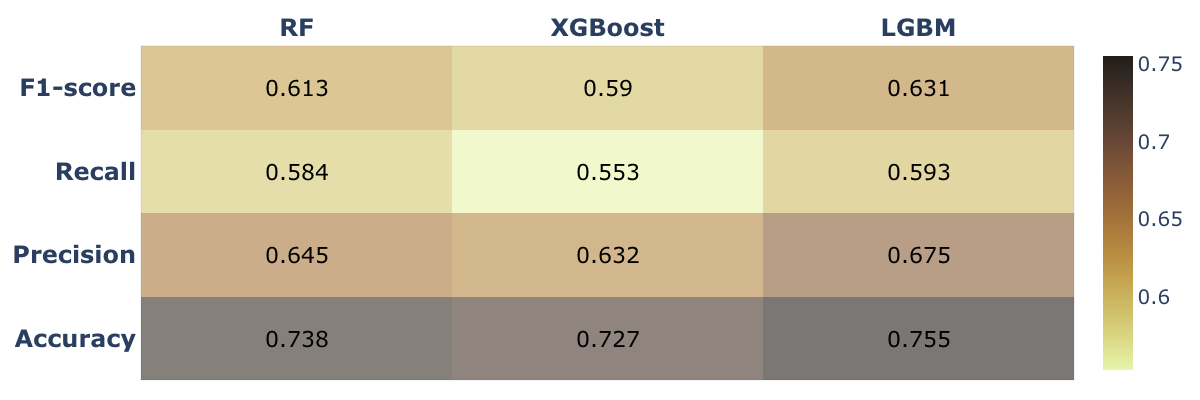

In [730]:
import numpy as np
import plotly.graph_objects as go
from functools import reduce
from itertools import product
from IPython.display import Image
SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
SUP = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")
z=[[np.round(evaluation1(y_test,pred1)[0],3),np.round(evaluation1(y_test,pred2)[0],3),
    np.round(evaluation1(y_test,pred4)[0],3)],
   
   [np.round(evaluation1(y_test,pred1)[1],3),np.round(evaluation1(y_test,pred2)[1],3),
    np.round(evaluation1(y_test,pred4)[1],3)],
   
   [np.round(evaluation1(y_test,pred1)[2],3),np.round(evaluation1(y_test,pred2)[2],3),
    np.round(evaluation1(y_test,pred4)[2],3)],
   
   [np.round(evaluation1(y_test,pred1)[3],3),np.round(evaluation1(y_test,pred2)[3],3),
   np.round(evaluation1(y_test,pred4)[3],3)]]

x=['<b>RF</b>', '<b>XGBoost</b>',  '<b>LGBM</b>', ]
y=['<b>Accuracy</b>','<b>Precision</b>','<b>Recall</b>','<b>F1-score</b>']

def get_anno_text(z_value):
    annotations=[]
    a, b = len(z_value), len(z_value[0])
    flat_z = reduce(lambda x,y: x+y, z_value) # z_value.flat if you deal with numpy
    coords = product(range(a), range(b))
    for pos, elem in zip(coords, flat_z):
        annotations.append({'font': {'color': 'black'},
                    'showarrow': False,
                    'text': str(elem),
                    'x': pos[1],
                    'y': pos[0],
                        'font.size':22   })
    return annotations

fig = go.Figure(data=go.Heatmap(
                   z=z,
                   x=x,
                   y=y,
                   hoverongaps = True, colorscale ='turbid',
    opacity=0.6,colorbar=dict(tickfont=dict(size=20)) ))#matter#

fig.update_layout(title={'text': "",
        'y':0.8,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
           plot_bgcolor='rgba(0,0,0,0)',       
    annotations = get_anno_text(z),
                 width=1200,
height=400,xaxis={'side': 'top'},margin=dict(l=20, r=20, t=20, b=20))

fig.update_xaxes(tickfont = dict(size=24),linewidth=0.1, linecolor='black',
    
                 mirror=True)
fig.update_yaxes(tickfont = dict(size=24),linewidth=0.1, linecolor='black',
        
                 mirror=True)
fig.write_image("table_22.png",engine="kaleido")
#plt.savefig("table.pdf", format="pdf", bbox_inches="tight")
fig.show()
Image('table_22.png')

# Varying class weights and accessing Probability thresholds

In [731]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# Create LightGBM datasets
train_set = lgb.Dataset(X_train, label=y_train)
# Define the initial model parameters
params = {
    'boosting_type': 'gbdt',
    'num_leaves': 70,
    'max_depth': 25,
    'learning_rate': 0.004796225126978845,
    'feature_fraction': 0.6036416679573813,
    'bagging_fraction': 0.7102057400975744,
    'bagging_freq': 5,
    'min_data_in_leaf': 188,
    'reg_lambda': 25.867047720071138,
    'objective': 'binary',
    'metric': 'binary_error'
}

# Perform cross-validation to find the best parameters
cv_results = lgb.cv(
    params,
    train_set,
    num_boost_round=100000,
    early_stopping_rounds=1000,
    verbose_eval=1000,
    stratified=True,
    nfold=5  # Number of folds for cross-validation
)

# Extract the best number of boosting rounds and the best score
best_num_boost_round = len(cv_results['binary_error-mean'])
best_score = min(cv_results['binary_error-mean'])

print(f'Best number of boosting rounds: {best_num_boost_round}')
print(f'Best score: {best_score}')

# Train the model with the best parameters
model = lgb.train(
    params,
    train_set,
    num_boost_round=best_num_boost_round,
    valid_sets=[lgb.Dataset(X_test, label=y_test)],  # Validation dataset
    verbose_eval=1000
)

# Predict on the test set
y_pred_prob = model.predict(X_test, num_iteration=model.best_iteration)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Retrieve the best parameters
best_params = model.params
print('Best parameters:', best_params)

[1000]	cv_agg's binary_error: 0.278176 + 0.0141904
[2000]	cv_agg's binary_error: 0.272339 + 0.0159588
[3000]	cv_agg's binary_error: 0.271329 + 0.0152969
Best number of boosting rounds: 2881
Best score: 0.270205895753341
[1000]	valid_0's binary_error: 0.277778
[2000]	valid_0's binary_error: 0.247475
Accuracy: 0.7515
Best parameters: {'boosting_type': 'gbdt', 'num_leaves': 70, 'max_depth': 25, 'learning_rate': 0.004796225126978845, 'feature_fraction': 0.6036416679573813, 'bagging_fraction': 0.7102057400975744, 'bagging_freq': 5, 'min_data_in_leaf': 188, 'reg_lambda': 25.867047720071138, 'objective': 'binary', 'metric': 'binary_error'}


   class_weights   roc_auc  best_threshold  accuracy_best
0   {0: 1, 1: 1}  0.779249               0       0.354545
1   {0: 1, 1: 2}  0.778589               0       0.354545
2   {0: 1, 1: 5}  0.776400               0       0.354545
3  {0: 1, 1: 10}  0.776224               0       0.354545


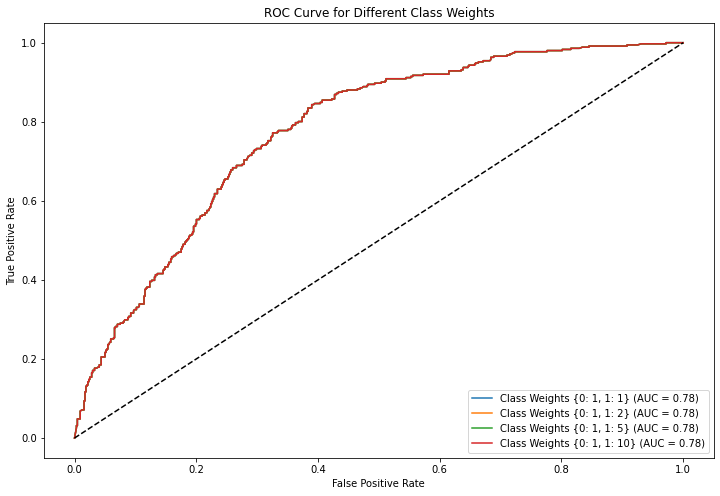

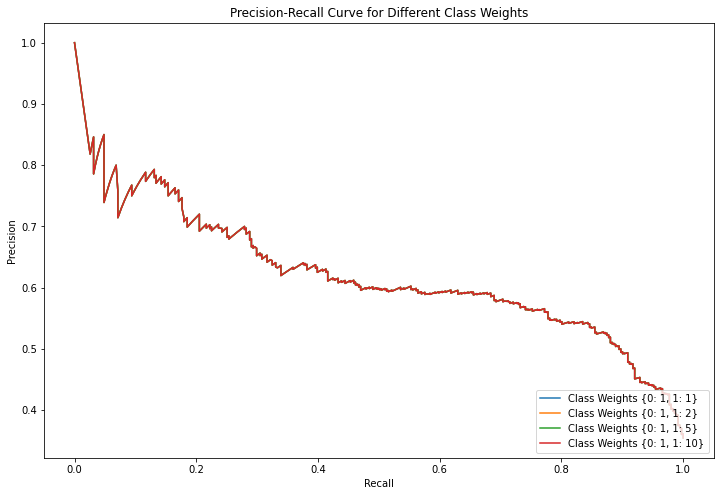

In [732]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, auc
import lightgbm as lgb
import matplotlib.pyplot as plt

# Define different class weights to test
class_weights_list = [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 5}, {0: 1, 1: 10}]

# Initialize dictionaries to store results
results = []

# Iterate over different class weights
for class_weights in class_weights_list:
    # Create LGBM classifier with class weights
    clf = lgb.LGBMClassifier(class_weight=class_weights,boosting_type= 'gbdt', num_leaves= 70, 
                             max_depth= 25, learning_rate=0.004796225126978845,
                             feature_fraction= 0.6036416679573813, bagging_fraction=0.7102057400975744, 
                             bagging_freq= 5, min_data_in_leaf= 188, reg_lambda=25.867047720071138, 
               verbose=-1,random_state=42)
    
    # Train the model
    clf.fit(X_train, y_train)
    
    # Predict probabilities
    y_proba = clf.predict_proba(X_test)[:, 1]
    
    # Evaluate performance with different thresholds
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
    fpr, tpr, roc_thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    
    # Check if there are thresholds
    if len(thresholds) > 0:
        # Determine best threshold for precision-recall tradeoff
        best_threshold_idx = np.argmax(precisions - recalls)
        if best_threshold_idx < len(thresholds):
            best_threshold = thresholds[best_threshold_idx]
        else:
            best_threshold = 0  # Default to 0 if index is out of bounds
    else:
        best_threshold = 0
    
    # Predict using the best threshold
    y_pred_best = (y_proba >= best_threshold).astype(int)
    accuracy_best = accuracy_score(y_test, y_pred_best)
    
    # Store results
    results.append({
        'class_weights': class_weights,
        'roc_auc': roc_auc,
        'best_threshold': best_threshold,
        'accuracy_best': accuracy_best
    })

# Convert results to DataFrame for better readability
results_df = pd.DataFrame(results)
# Print results
print(results_df)
# Plot ROC Curve for each class weight setting
plt.figure(figsize=(12, 8))
for i, class_weights in enumerate(class_weights_list):
    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f'Class Weights {class_weights} (AUC = {results_df["roc_auc"][i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Class Weights')
plt.legend(loc='lower right')
plt.show()
# Plot Precision-Recall Curve for each class weight setting
plt.figure(figsize=(12, 8))
for i, class_weights in enumerate(class_weights_list):
    precisions, recalls, _ = precision_recall_curve(y_test, clf.predict_proba(X_test)[:, 1])
    plt.plot(recalls, precisions, label=f'Class Weights {class_weights}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Different Class Weights')
plt.legend(loc='lower right')
plt.show()

  class_weights  best_threshold  best_accuracy  \
0  {0: 1, 1: 1}        0.504949       0.754545   
1  {0: 1, 1: 2}        0.643535       0.755556   
2  {0: 1, 1: 3}        0.683131       0.754545   
3  {0: 1, 1: 4}        0.772222       0.754545   
4  {0: 1, 1: 5}        0.693030       0.753535   
5  {0: 1, 1: 6}        0.801919       0.753535   

                                          accuracies  \
0  [0.45252525252525255, 0.498989898989899, 0.527...   
1  [0.43434343434343436, 0.4717171717171717, 0.49...   
2  [0.42525252525252527, 0.4626262626262626, 0.48...   
3  [0.42424242424242425, 0.4575757575757576, 0.48...   
4  [0.42525252525252527, 0.4484848484848485, 0.47...   
5  [0.42525252525252527, 0.45454545454545453, 0.4...   

                                          thresholds  
0  [0.01, 0.0198989898989899, 0.02979797979797979...  
1  [0.01, 0.0198989898989899, 0.02979797979797979...  
2  [0.01, 0.0198989898989899, 0.02979797979797979...  
3  [0.01, 0.0198989898989899, 0.0297

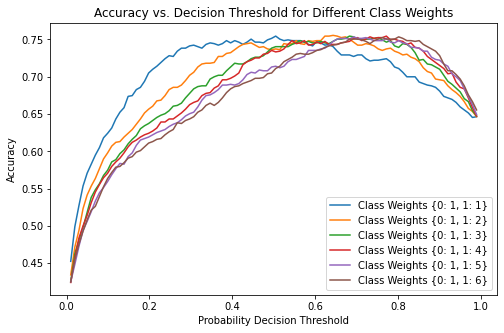

In [733]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, auc
import lightgbm as lgb
import matplotlib.pyplot as plt



class_weights_list = [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4},{0: 1, 1: 5},{0: 1, 1: 6}]

# Initialize dictionaries to store results
results = []

# Probability thresholds to test
thresholds_to_test = np.linspace(0.01, 0.99, 100)

# Iterate over different class weights
for class_weights in class_weights_list:
    # Create LGBM classifier with class weights
    clf = lgb.LGBMClassifier(class_weight=class_weights, boosting_type= 'gbdt', colsample_bytree=0.3158372113629838,
               learning_rate=0.0737698358037508, max_bin=511, n_estimators=139,
               num_leaves=366, reg_alpha=0.004049096820212068,
               reg_lambda=0.020151533326488984, verbose=-1,
                             objective= 'binary', metric= 'binary_error',random_state=42)
    
    # Train the model
    clf.fit(X_train, y_train)
    
    # Predict probabilities
    y_proba = clf.predict_proba(X_test)[:, 1]
    
    # Initialize a list to store accuracy for different thresholds
    accuracies = []
    
    # Test each threshold
    for threshold in thresholds_to_test:
        y_pred = (y_proba >= threshold).astype(int)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    
    # Store results
    results.append({
        'class_weights': class_weights,
        'best_threshold': thresholds_to_test[np.argmax(accuracies)],
        'best_accuracy': max(accuracies),
        'accuracies': accuracies,
        'thresholds': thresholds_to_test
    })

# Convert results to DataFrame for better readability
results_df = pd.DataFrame(results)

# Print results
print(results_df)

# Plot accuracy vs. threshold for each class weight setting
plt.figure(figsize=(8, 5))
for i, class_weights in enumerate(class_weights_list):
    plt.plot(results[i]['thresholds'], results[i]['accuracies'], label=f'Class Weights {class_weights}')
plt.xlabel('Probability Decision Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Decision Threshold for Different Class Weights')
plt.legend(loc='lower right')
plt.savefig("class_weights.pdf", format="pdf", bbox_inches="tight",dpi=1000)
plt.show()